In [7]:
%load_ext autoreload
%autoreload 2

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

In [157]:
from CustomTree.customTree import CustomDecisionTree
from CustomTree.decisionTreeToCustomTreeParser import sklearn_tree_to_custom_tree
# from CustomTree.graphicallyShowingTree import visualize_custom_tree #, plot_tree_partitions, plot_tree_partitions_2d_rectangles
from CustomTree.quadratic_constraint_optimization import gurobi_minimax, predict_with_minmax_model
from CustomTree.custom_tree_pruning import global_greedy_prune, global_greedy_prune_with_custom_cost, get_custom_cost_function

In [246]:
from Visualization.graphicallyShowingTree import visualize_custom_tree
from Visualization.partition_plot_matplotlib import plot_tree_partitions, plot_tree_partitions_2d_rectangles
from Visualization.partition_plot_matplotlib import plot_tree_partitions_3d_scatter, plot_tree_partitions_3d_cubes
from Visualization.partition_plot_plotly import plot_tree_partitions_plotly

In [197]:
from CustomTree.evaluationMethods import normalized_root_mean_square_error, mean_absolute_error

In [13]:

dataset_paths = {
    "Jet" : r'/Users/khalilulrehman/Academic/Phd Italy 2023_26/University of LAquila/Research Papers tasks/Benchmarks_Systems/Robust Control for Dynamical Systems With Non-Gaussian Noise via Formal Abstractions/Neural-Abstractions-V2/Dataset/jet/jet_10000/data_jet_10000.csv',
    # "Jet2" : r'/Users/khalilulrehman/Academic/Phd Italy 2023_26/University of LAquila/Research Papers tasks/Benchmarks_Systems/Robust Control for Dynamical Systems With Non-Gaussian Noise via Formal Abstractions/Neural-Abstractions-V2/Dataset/jet/jet_10000/data_jet_10000.csv',
}



# Jet System Experiment

In [214]:
jet_data_address = r'/Users/khalilulrehman/Academic/Phd Italy 2023_26/University of LAquila/Research Papers tasks/Benchmarks_Systems/Robust Control for Dynamical Systems With Non-Gaussian Noise via Formal Abstractions/Neural-Abstractions-V2/Dataset/jet/jet_10000/data_jet_10000.csv'
# jet_data_address = r'/Users/khalilulrehman/Academic/Phd Italy 2023_26/University of LAquila/Research Papers tasks/Benchmarks_Systems/Robust Control for Dynamical Systems With Non-Gaussian Noise via Formal Abstractions/Neural-Abstractions-V2/Dataset/steam/steam_10000/data_steam_10000.csv'

In [216]:
read_df = pd.read_csv(jet_data_address)
read_df.head()

,X1,X2,Y1,Y2
0,-0.566516,0.212083,-0.702585,-1.911632
1,0.494563,-0.467713,-0.059659,1.951401
2,-0.096054,1.006577,-1.119974,-1.294739
3,0.119205,-0.635532,0.513371,0.993149
4,0.256646,-1.095950,0.888697,1.865889


In [218]:


# X_read = read_df[["X1", "X2"]].values
# y_read = read_df[["Y1", "Y2"]].values
X_attribute_count = 2
Y_class_count = 2
X_read = read_df.iloc[:, :X_attribute_count].values
y_read = read_df.iloc[:, X_attribute_count:X_attribute_count + Y_class_count].values

X_train, X_test, y_train, y_test = train_test_split(
    X_read, y_read, test_size=0.3, random_state=42
)


dt_model_tree = DecisionTreeRegressor(
    max_depth=4, #8,          # intentionally deep
    min_samples_leaf=1,
    random_state=42
)

dt_model_tree.fit(X_train, y_train)



DecisionTreeRegressor(max_depth=4, random_state=42)

In [220]:

custom_tree = sklearn_tree_to_custom_tree(dt_model_tree, X_train)
print(f"Number of Nodes = {custom_tree.num_nodes()}\nNumber of Leaves = {custom_tree.num_leaves()}\nDepth of Tree = {custom_tree.compute_max_depth()}")



Number of Nodes = 31
Number of Leaves = 16
Depth of Tree = 4


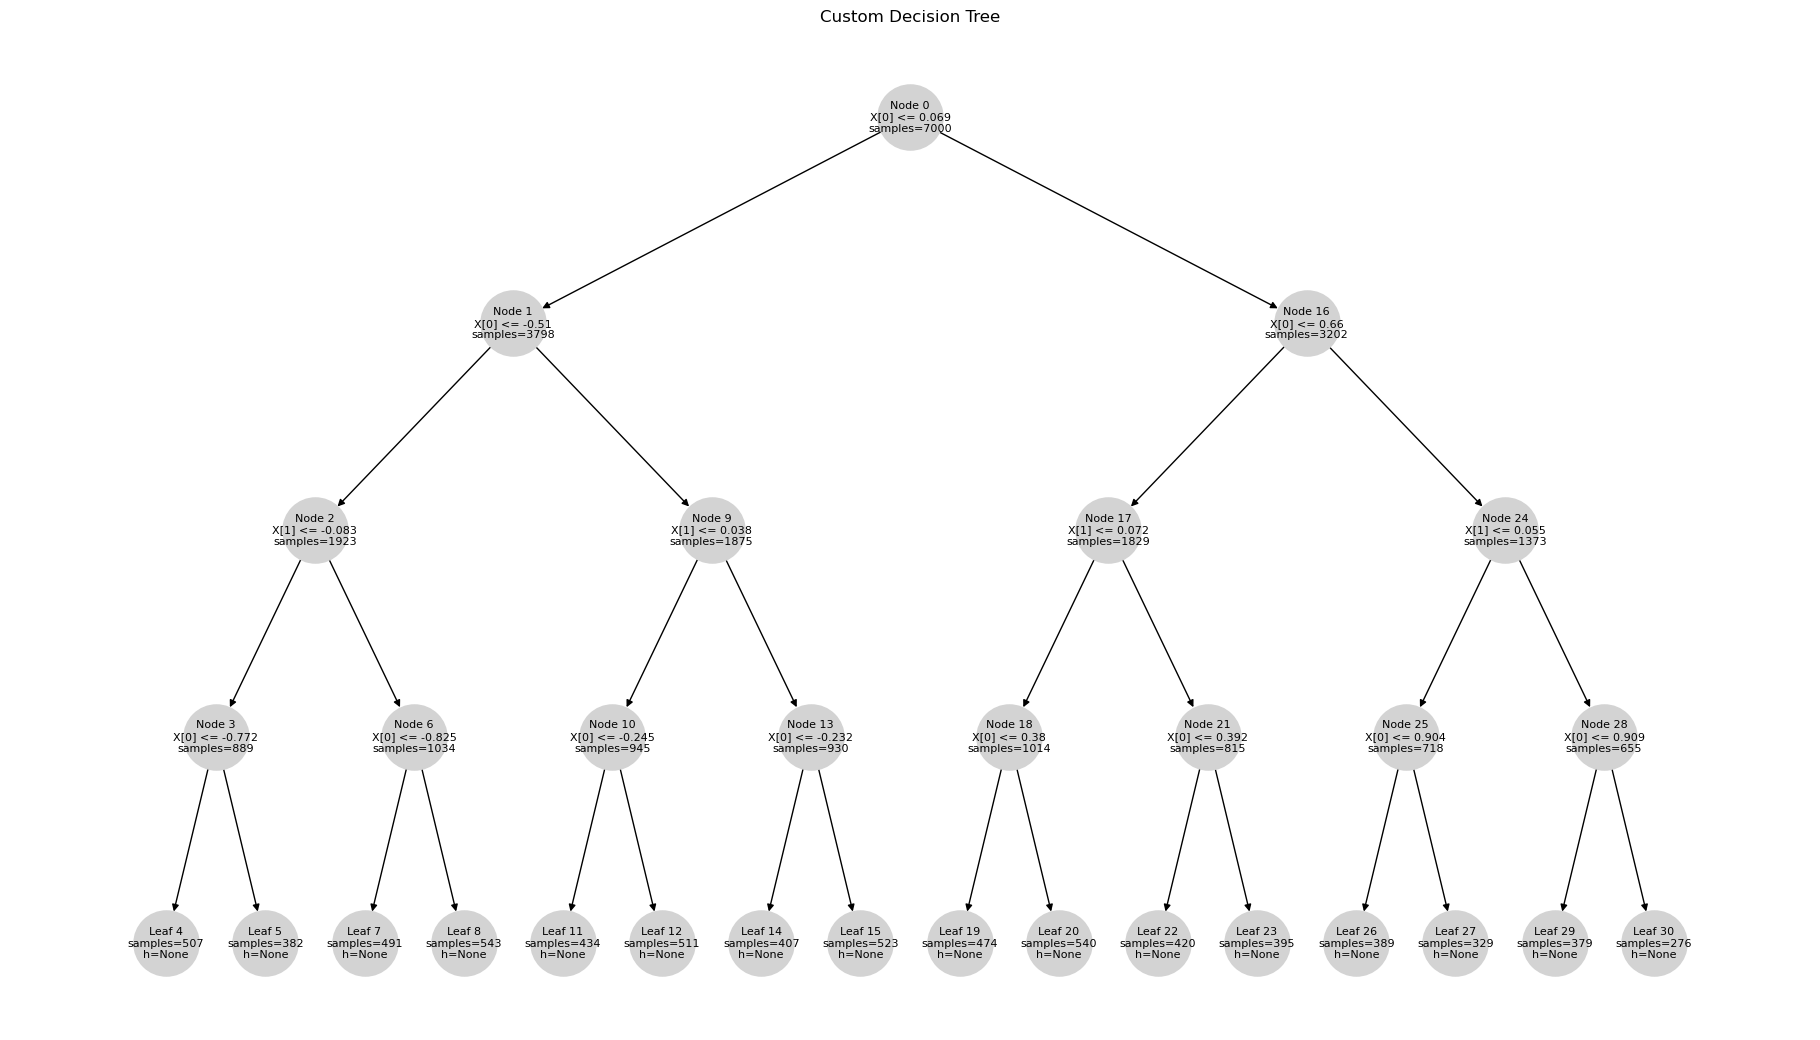

In [223]:
visualize_custom_tree(custom_tree)

In [225]:
# optimize original leaves
for leaf in custom_tree.get_leaves():
    M_val, m0_val, h_val = gurobi_minimax(
        X_train[leaf.sample_indices],
        y_train[leaf.sample_indices],
    )

    leaf.h = h_val
    leaf.M = M_val
    leaf.M_0 = m0_val


print("BEFORE")
print("nodes :", custom_tree.num_nodes())
print("leaves:", custom_tree.num_leaves())
print("depth :", custom_tree.compute_max_depth())





Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
BEFORE
nodes : 31
leaves: 16
depth : 4


In [31]:
test_h_leaves = custom_tree.get_leaves()
for test_leaf in test_h_leaves:
    print(test_leaf.h)

2.2395863934438095e-06
2.139045455423643e-05
6.398303828482817e-07
3.831344442731663e-05
6.654587217072976e-05
0.0002811544427487657
8.152837494436093e-05
0.0002410377740623342
0.0004964563372905506
0.0004962637630116564
0.0005632086559088031
0.0004061171392524297
0.00039026384867938384
0.00020694221548187426
0.0004062753221385704
0.00018375882138962172


Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
[ITER 1] pruning node 6 delta=-0.0999
Using Gurobi minimax solver...


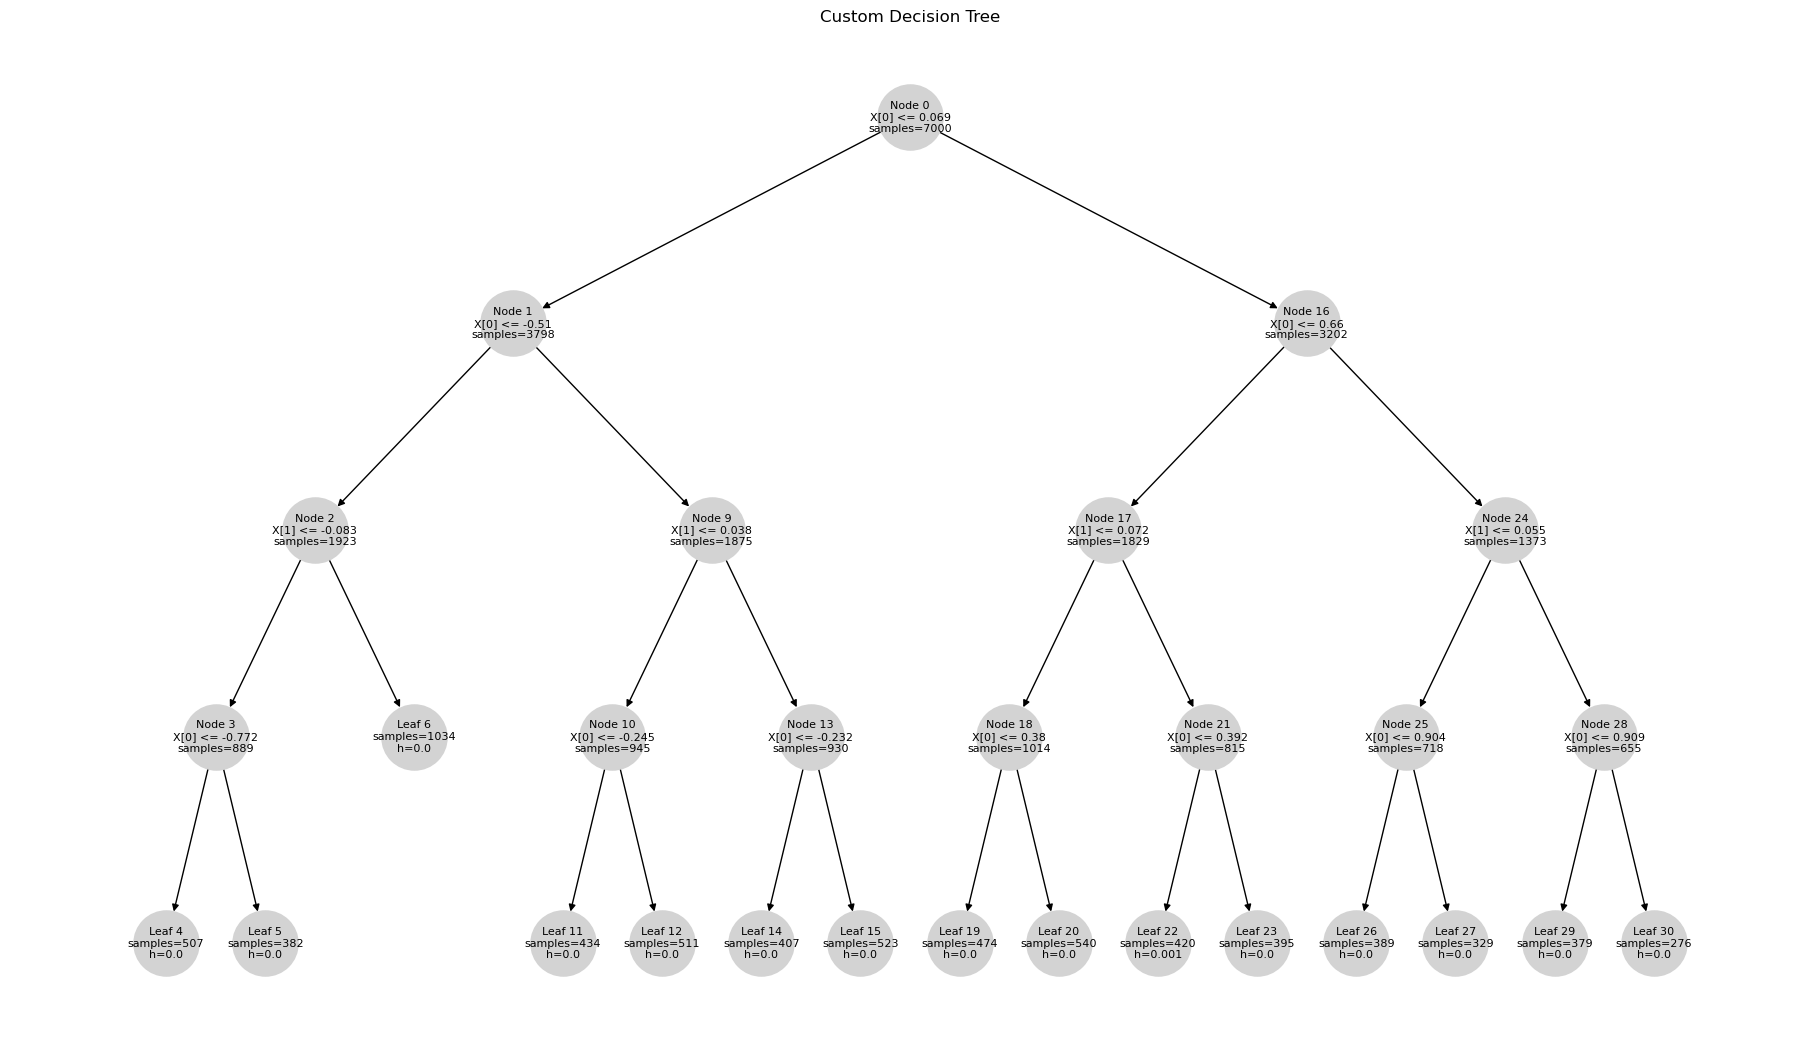

Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
[ITER 2] pruning node 3 delta=-0.0998
Using Gurobi minimax solver...


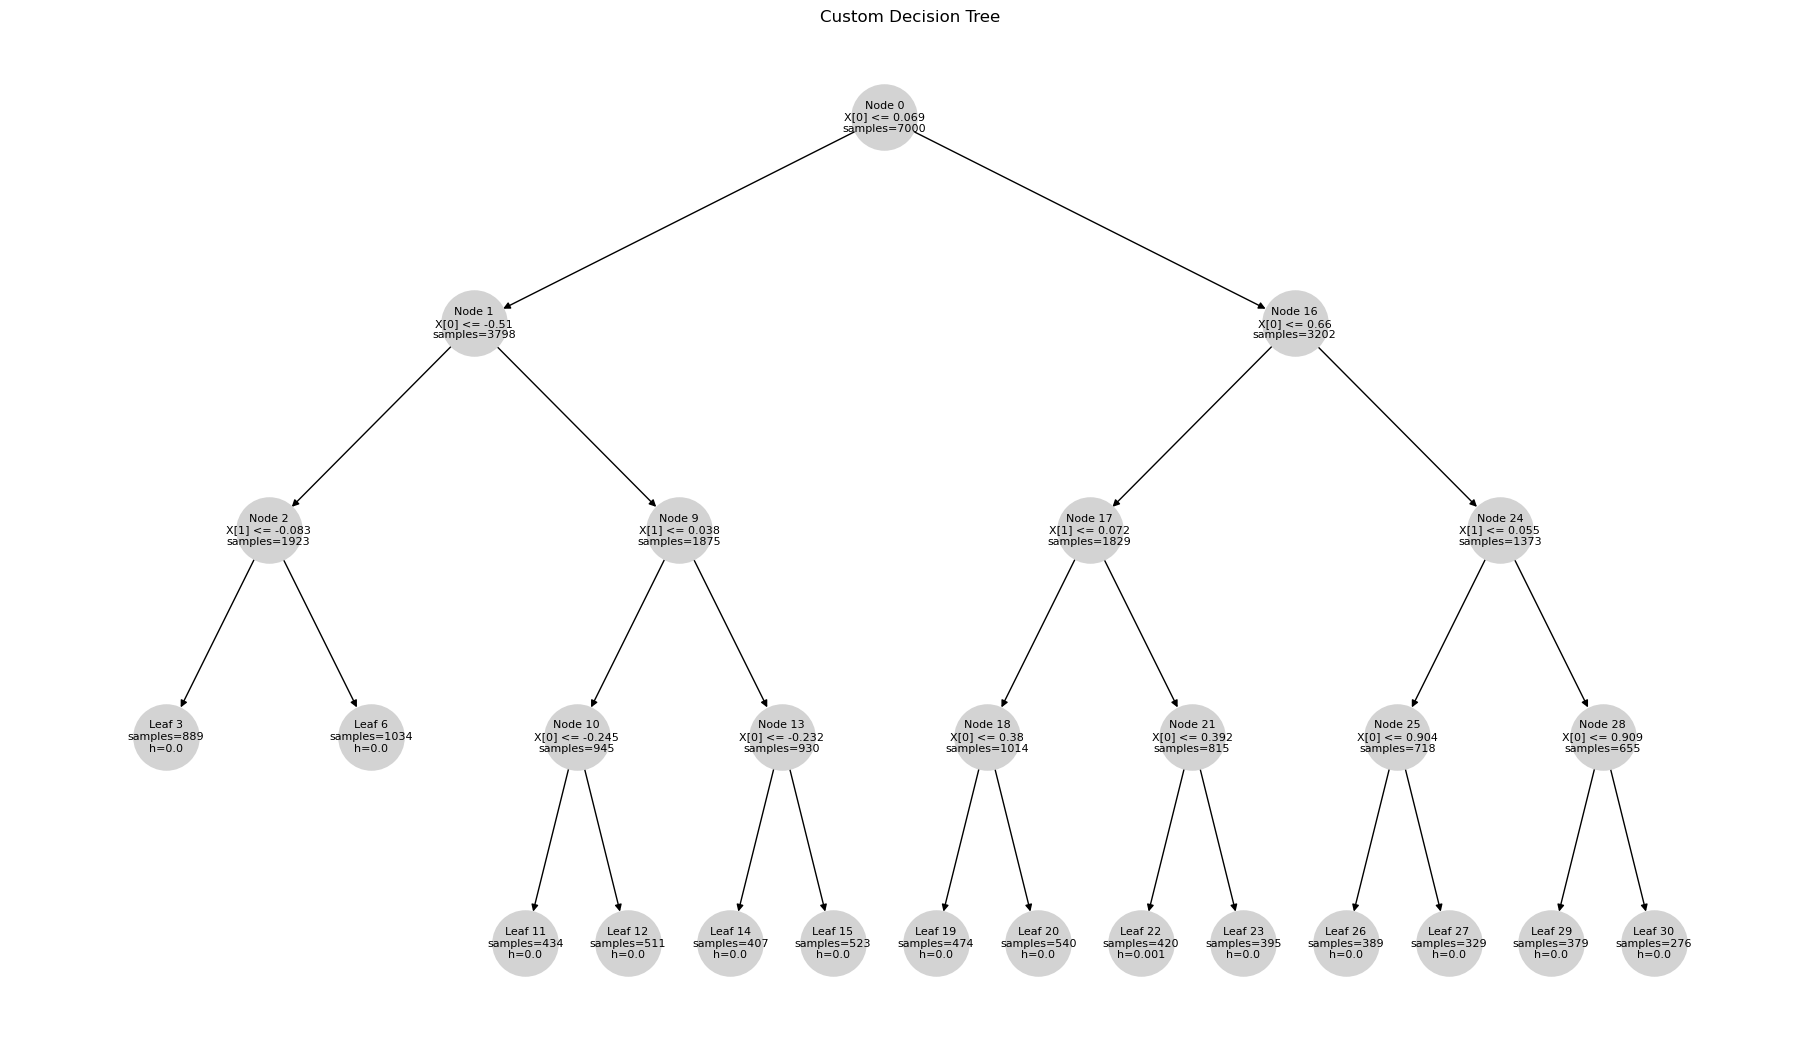

Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
[ITER 3] pruning node 2 delta=-0.1002
Using Gurobi minimax solver...


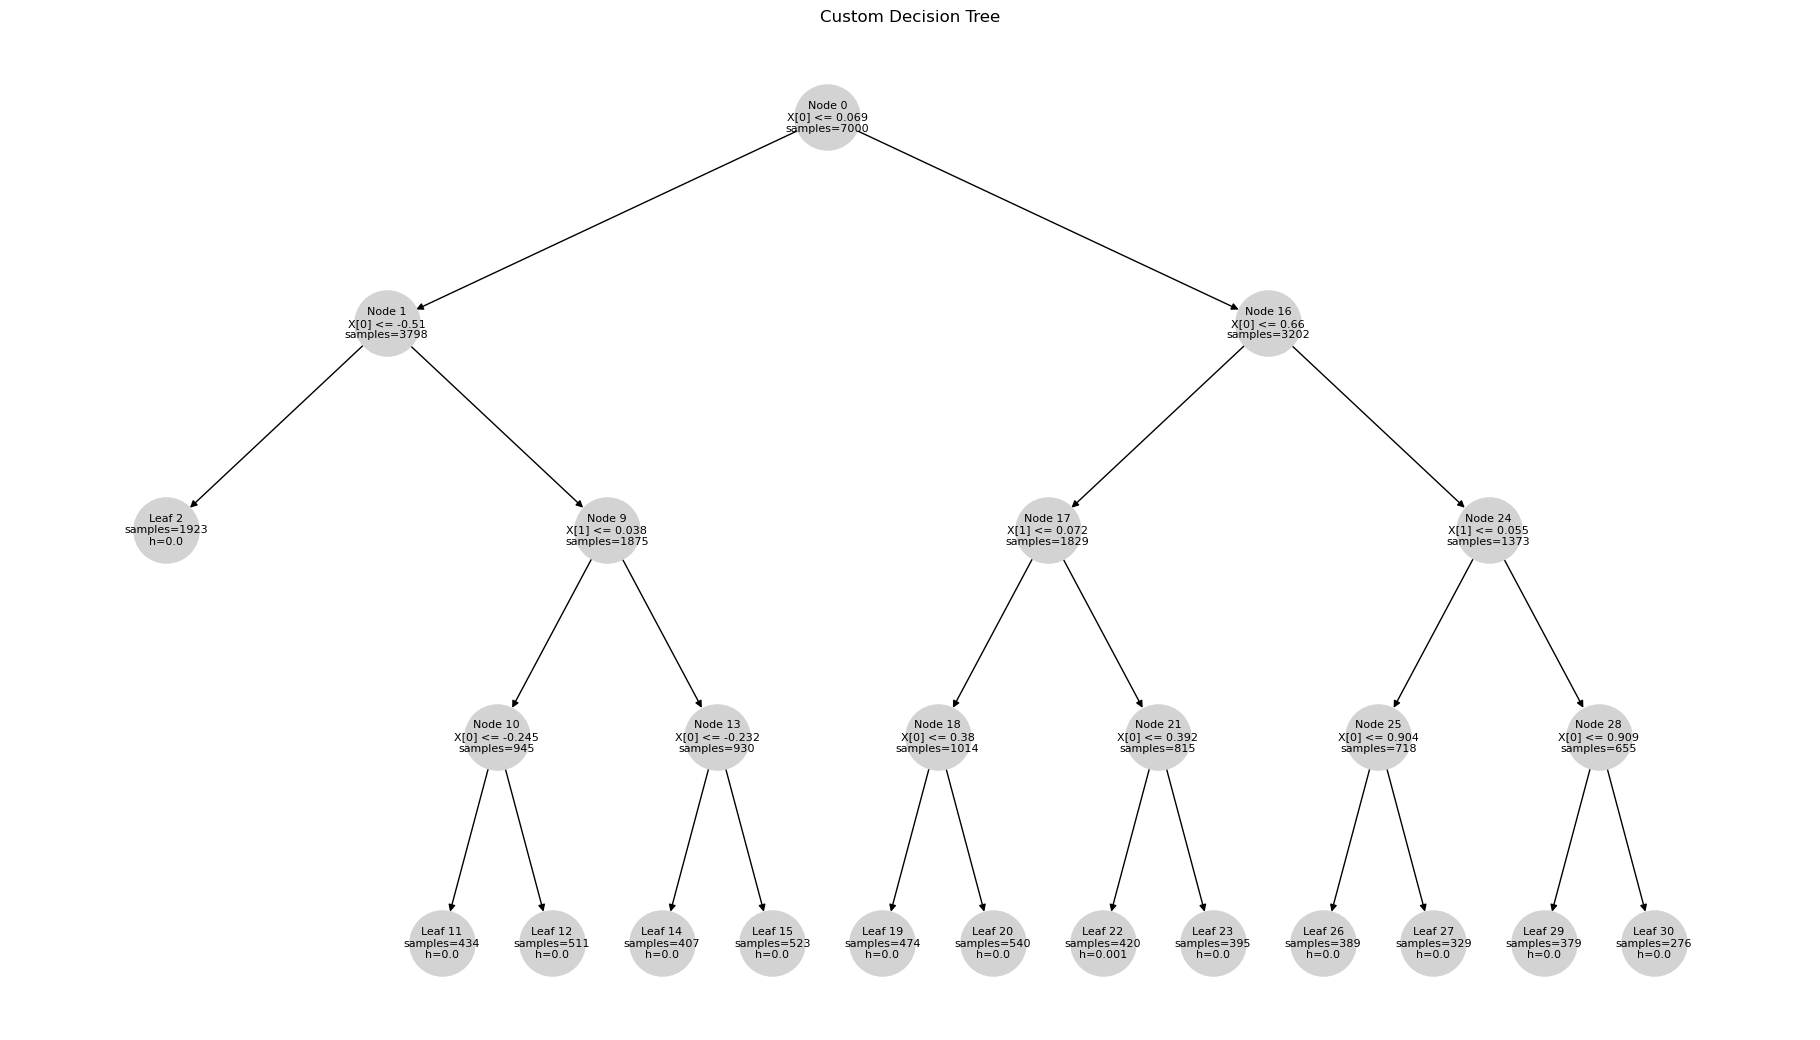

Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
[ITER 4] pruning node 10 delta=-0.0980
Using Gurobi minimax solver...


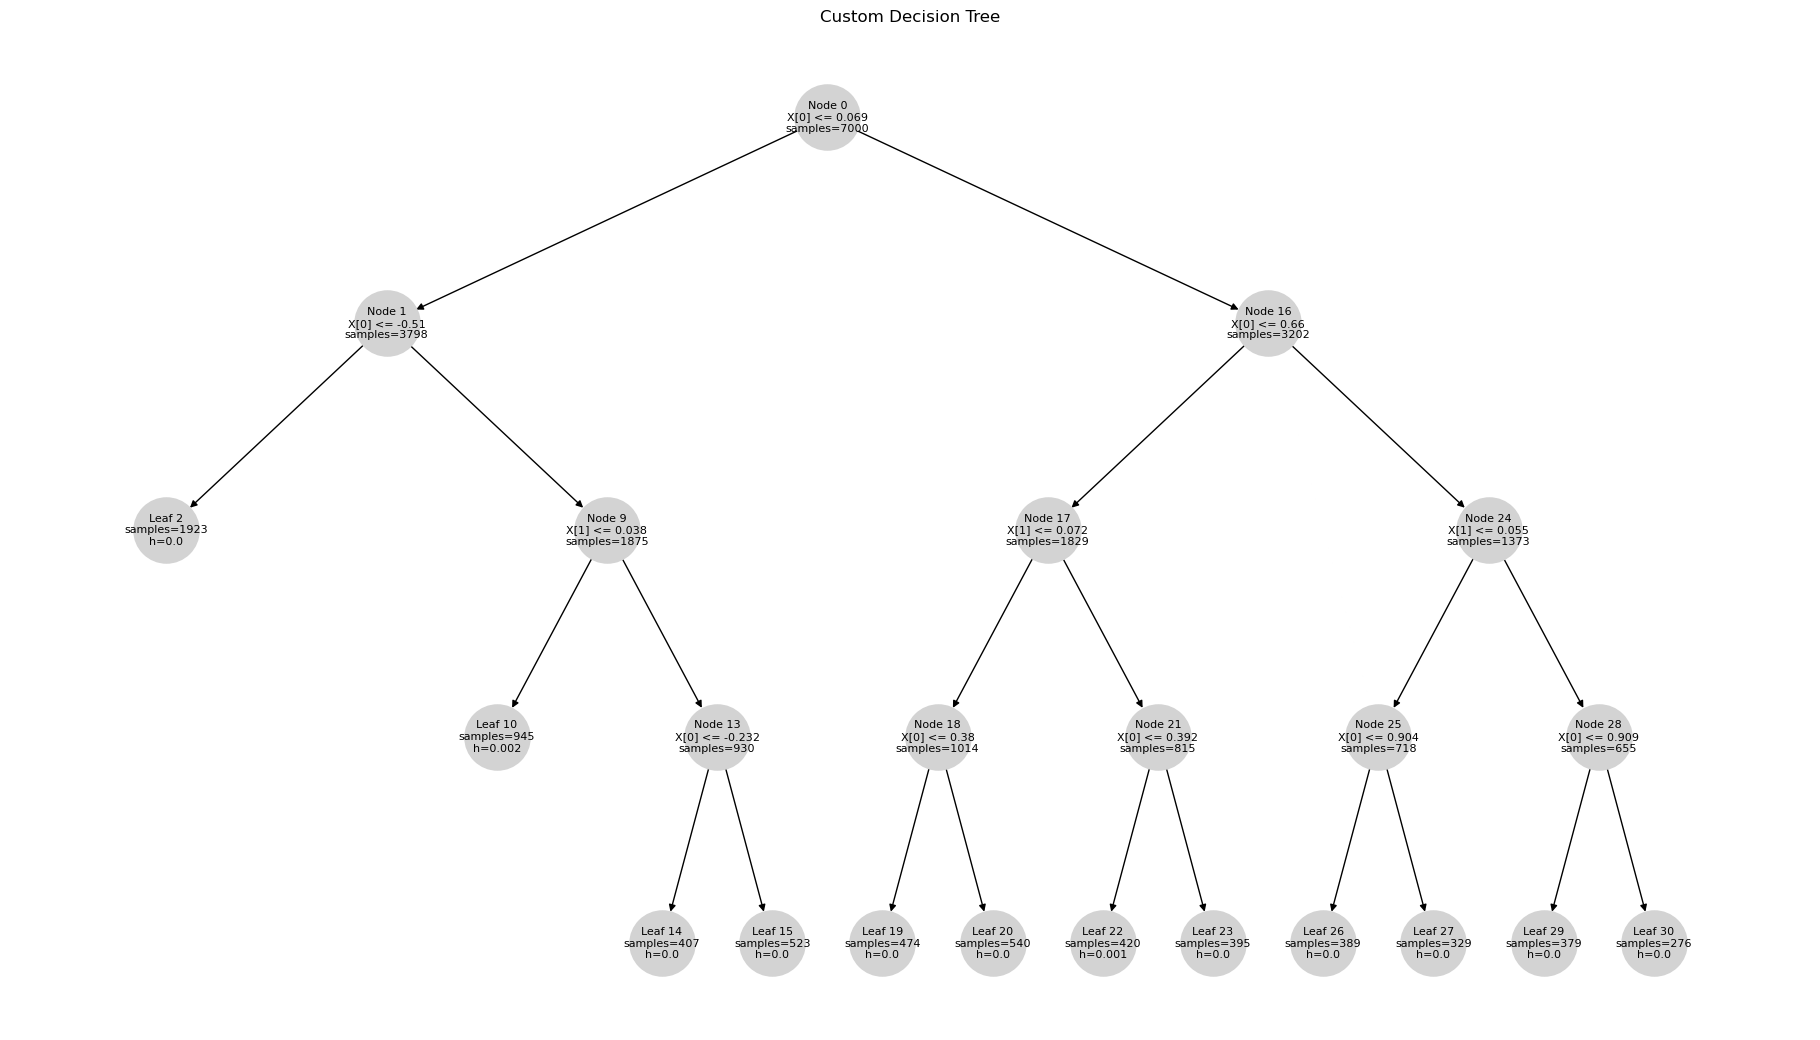

Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
[ITER 5] pruning node 13 delta=-0.0979
Using Gurobi minimax solver...


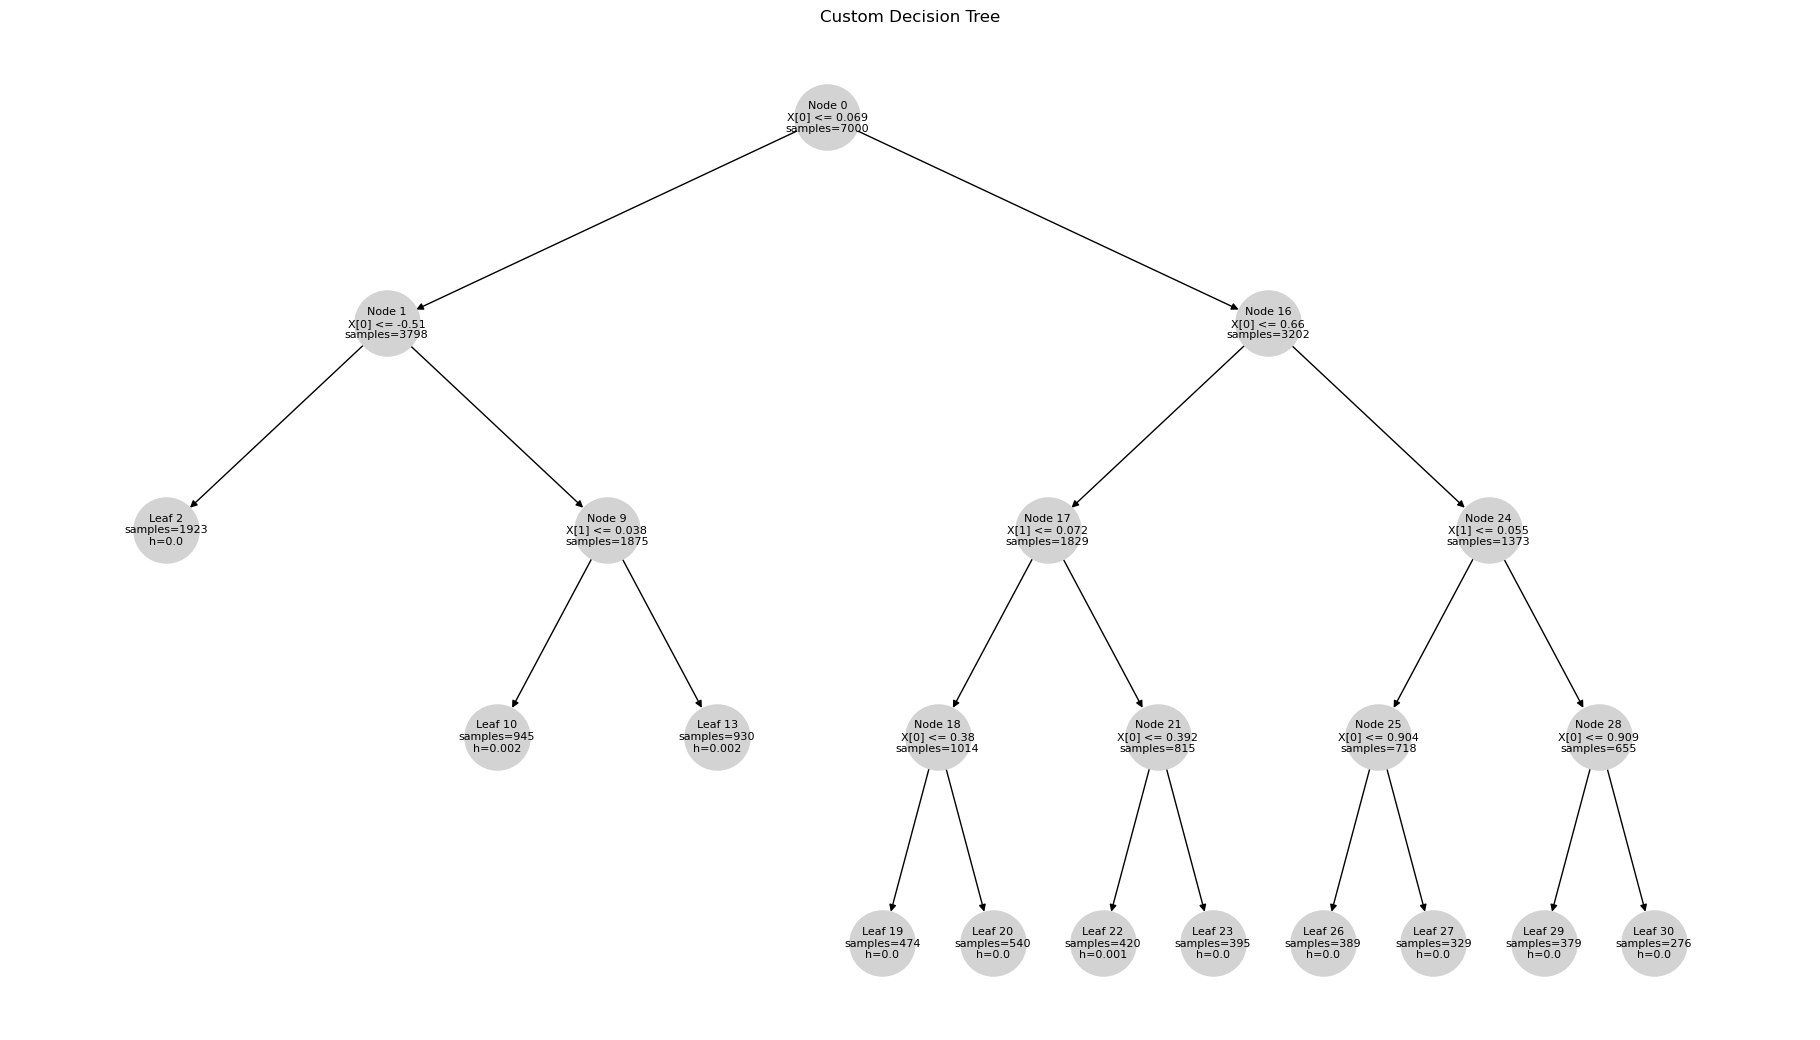

Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
[ITER 6] pruning node 9 delta=-0.1024
Using Gurobi minimax solver...


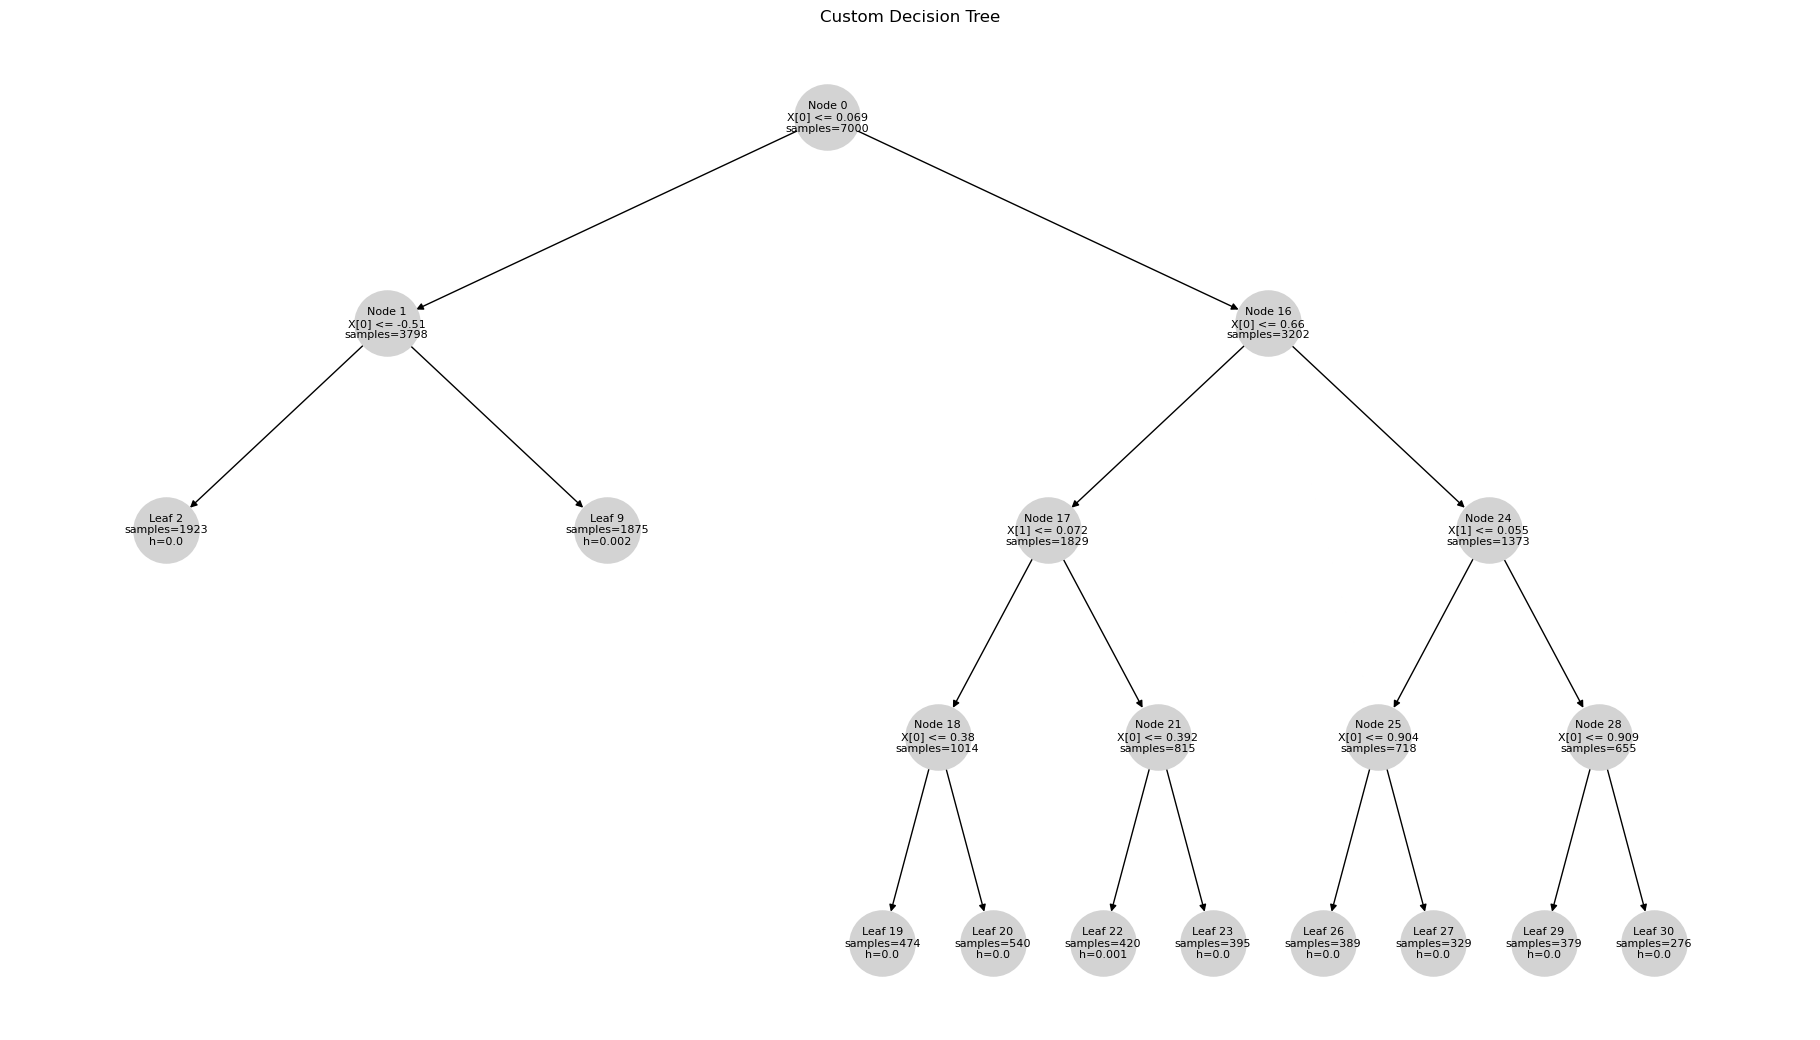

Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
[ITER 7] pruning node 28 delta=-0.0961
Using Gurobi minimax solver...


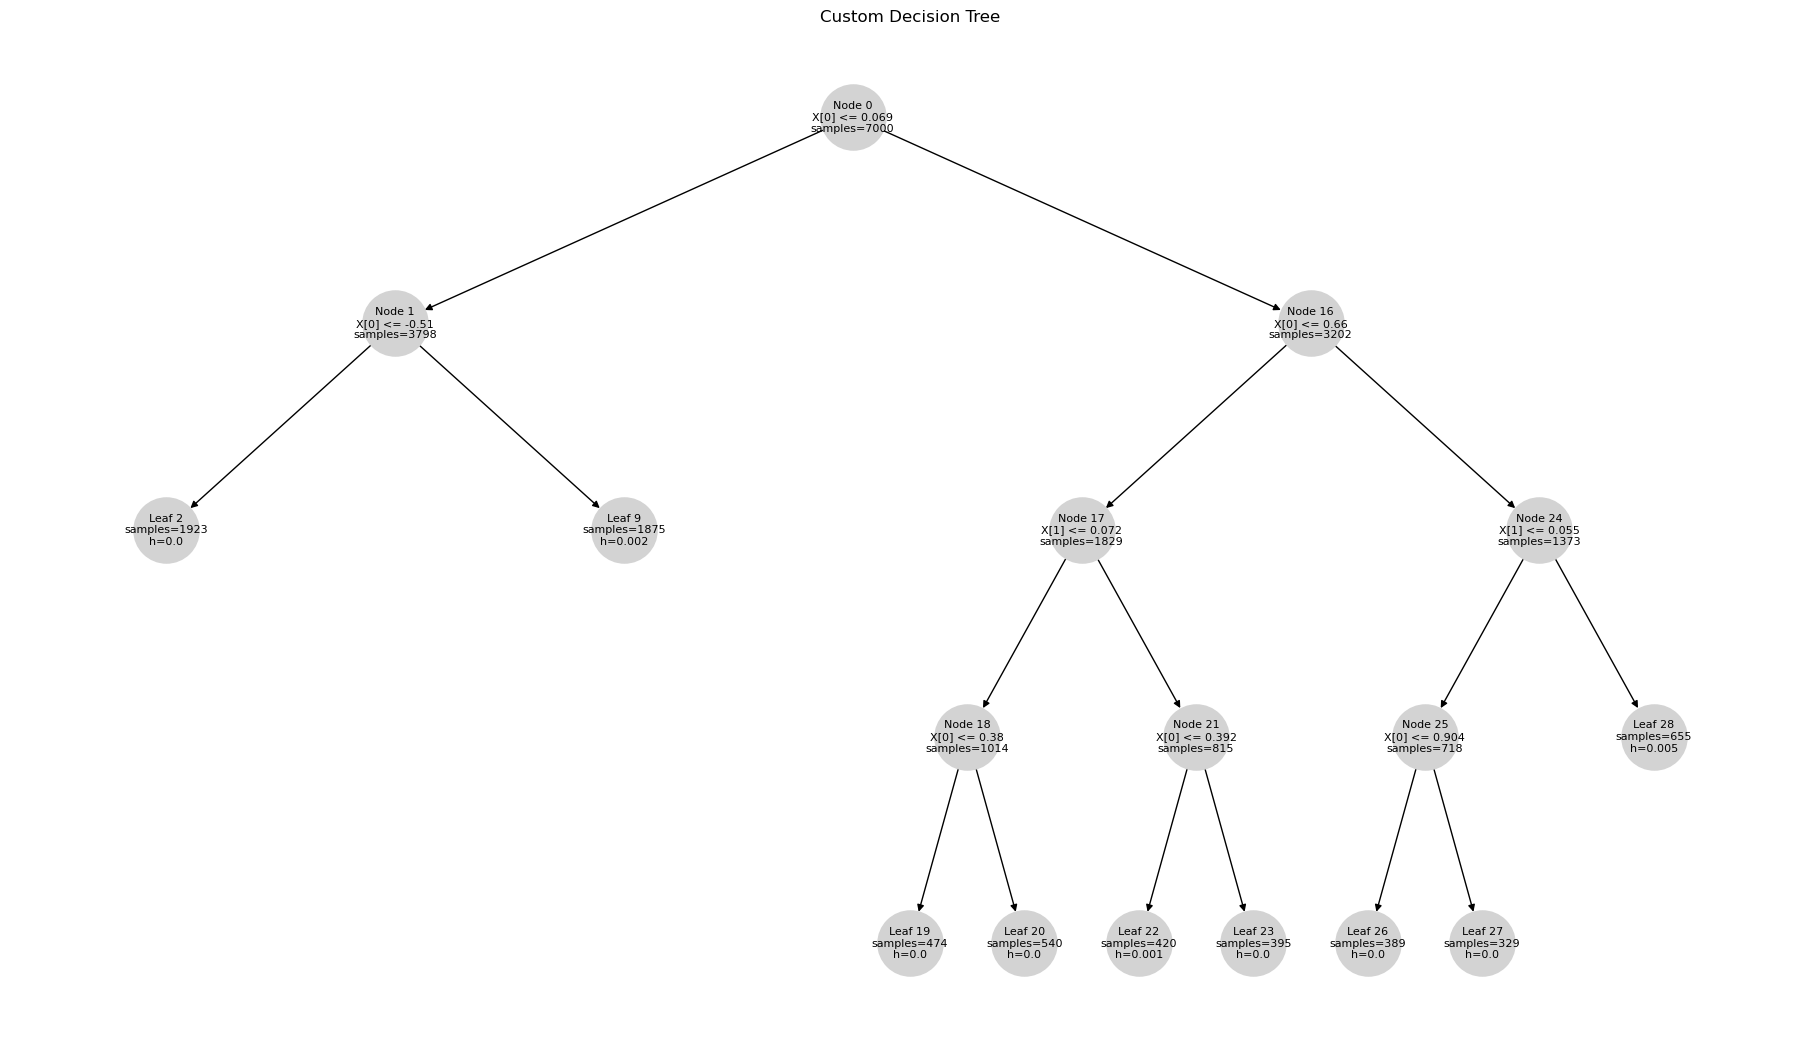

Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
[ITER 8] pruning node 25 delta=-0.0960
Using Gurobi minimax solver...


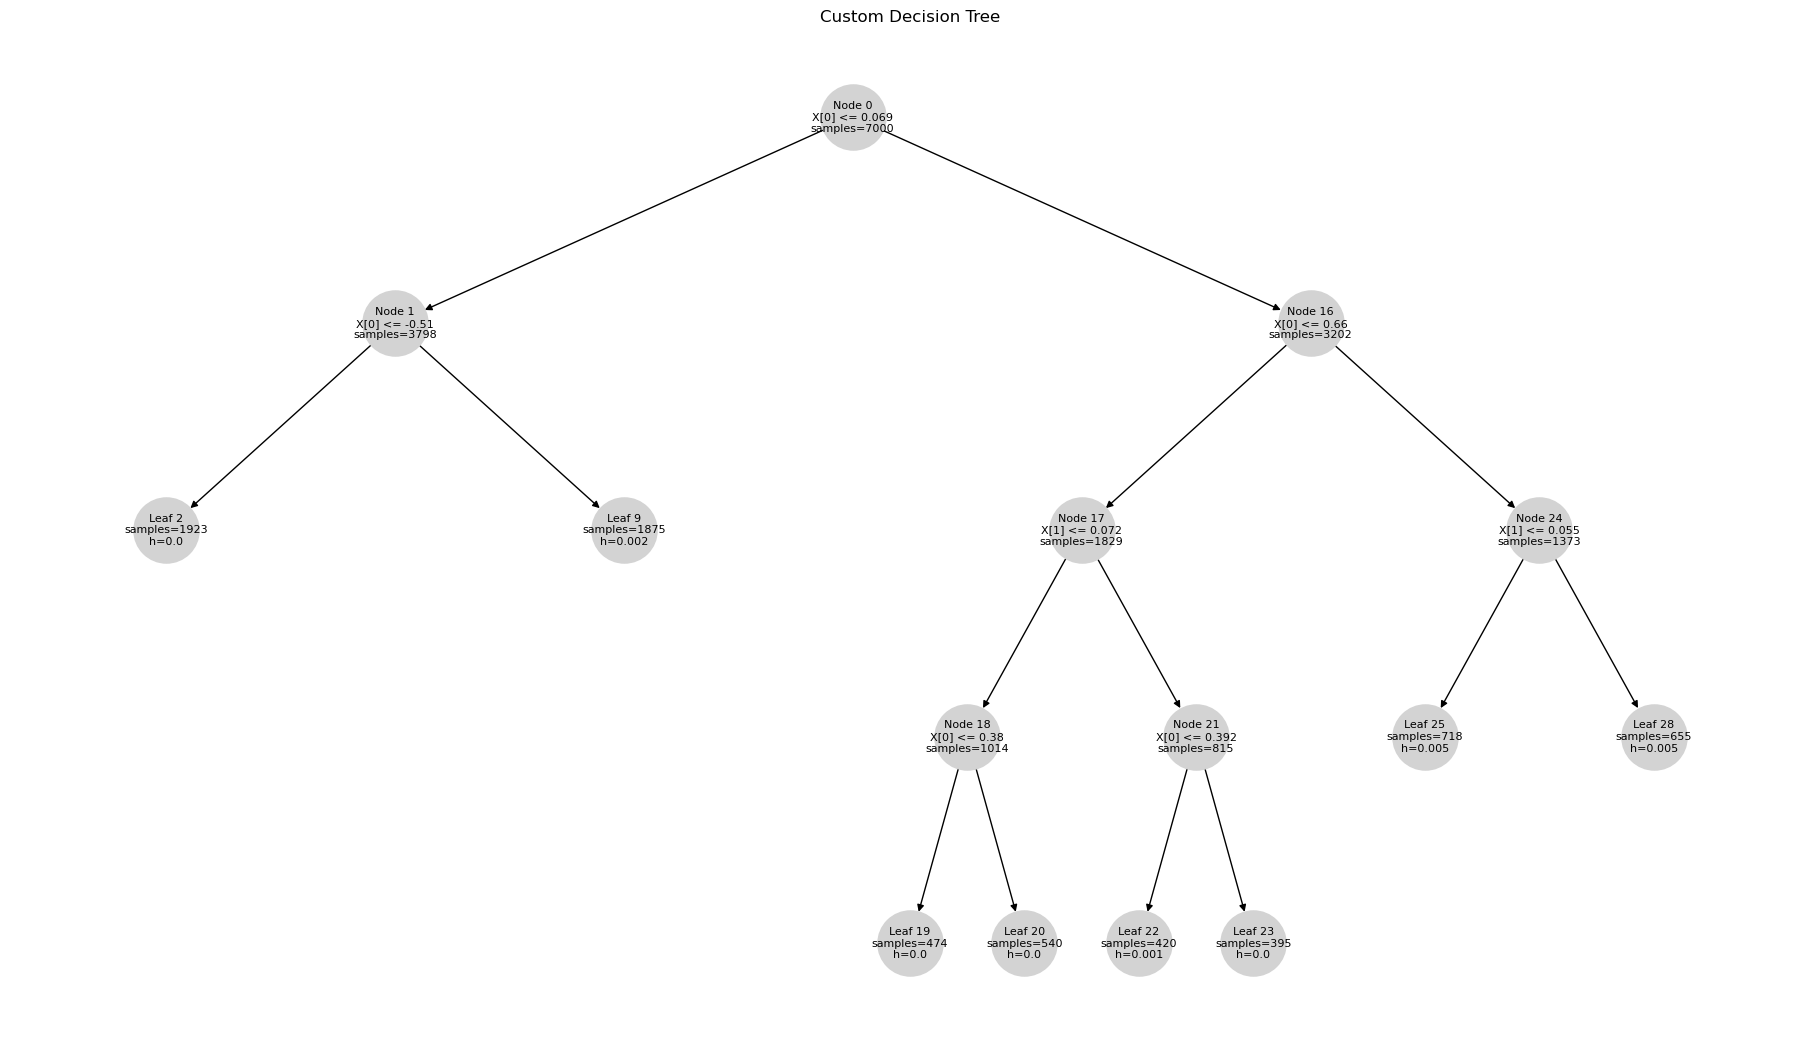

Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
[ITER 9] pruning node 24 delta=-0.1045
Using Gurobi minimax solver...


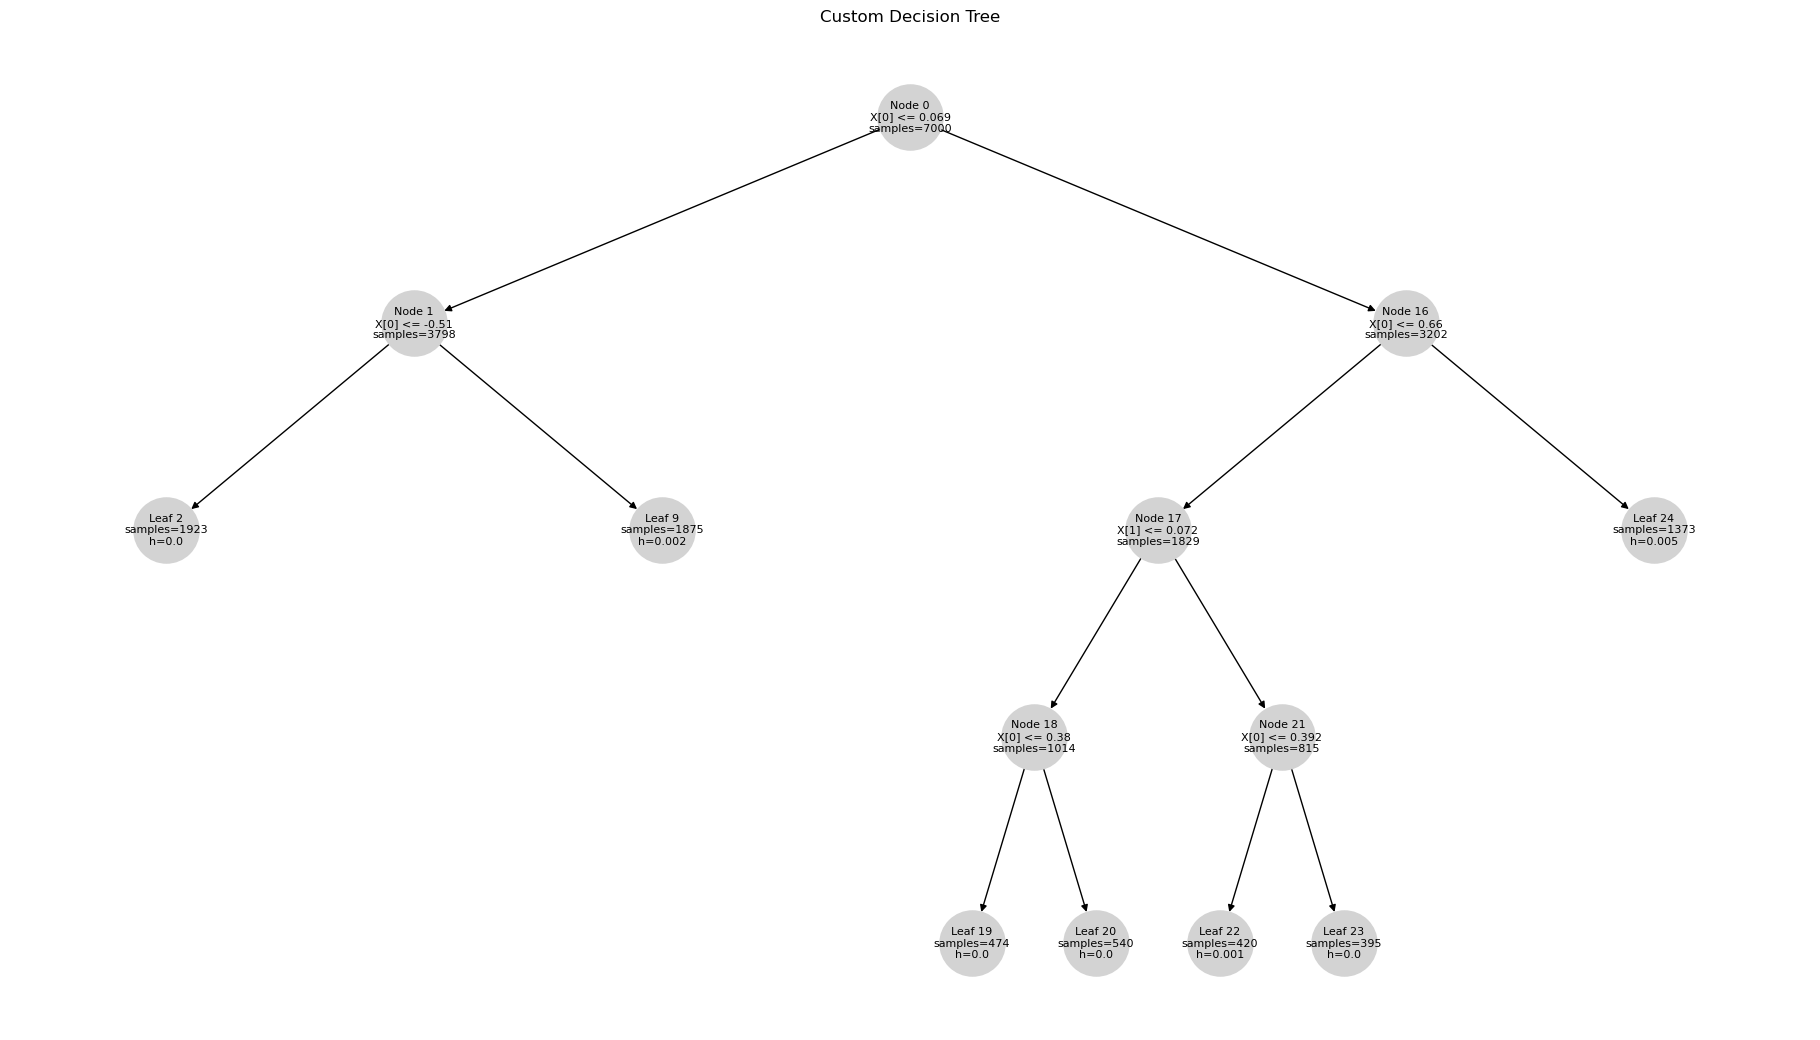

Using Gurobi minimax solver...
Using Gurobi minimax solver...
Using Gurobi minimax solver...
[ITER 10] pruning node 21 delta=-0.0931
Using Gurobi minimax solver...


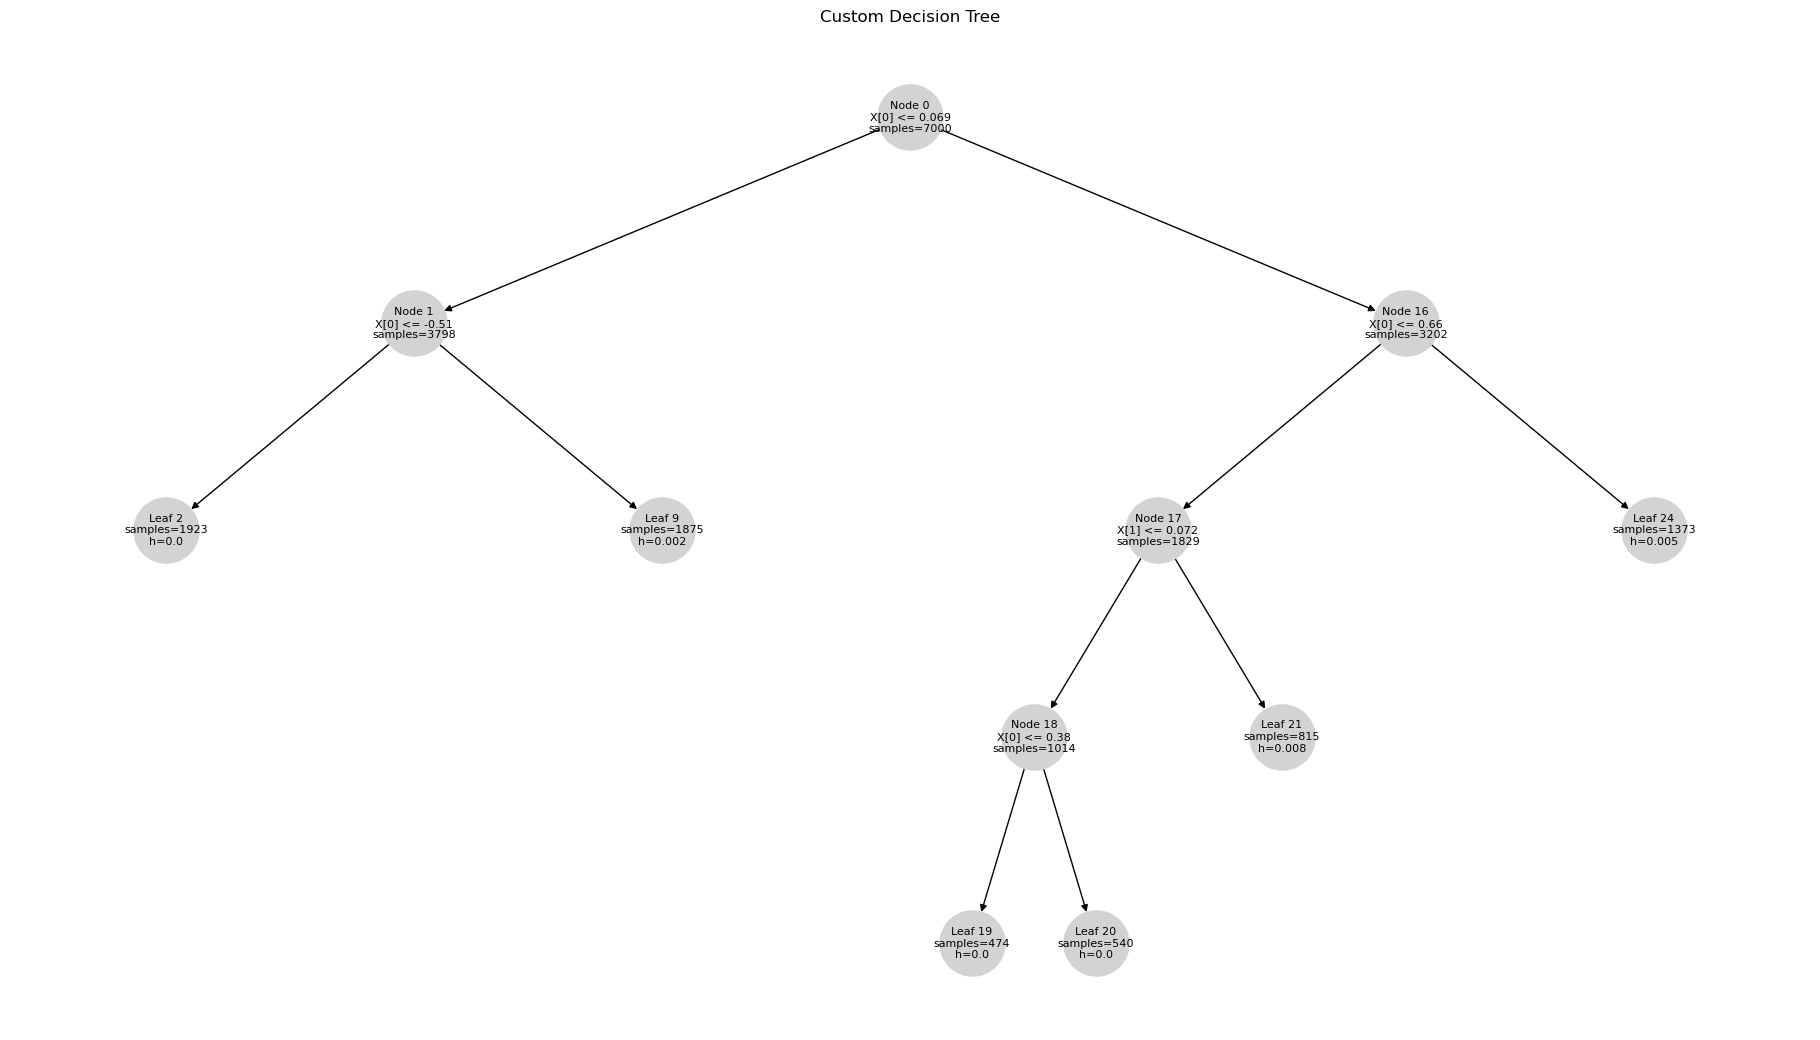

Using Gurobi minimax solver...
Using Gurobi minimax solver...
[ITER 11] pruning node 18 delta=-0.0930
Using Gurobi minimax solver...


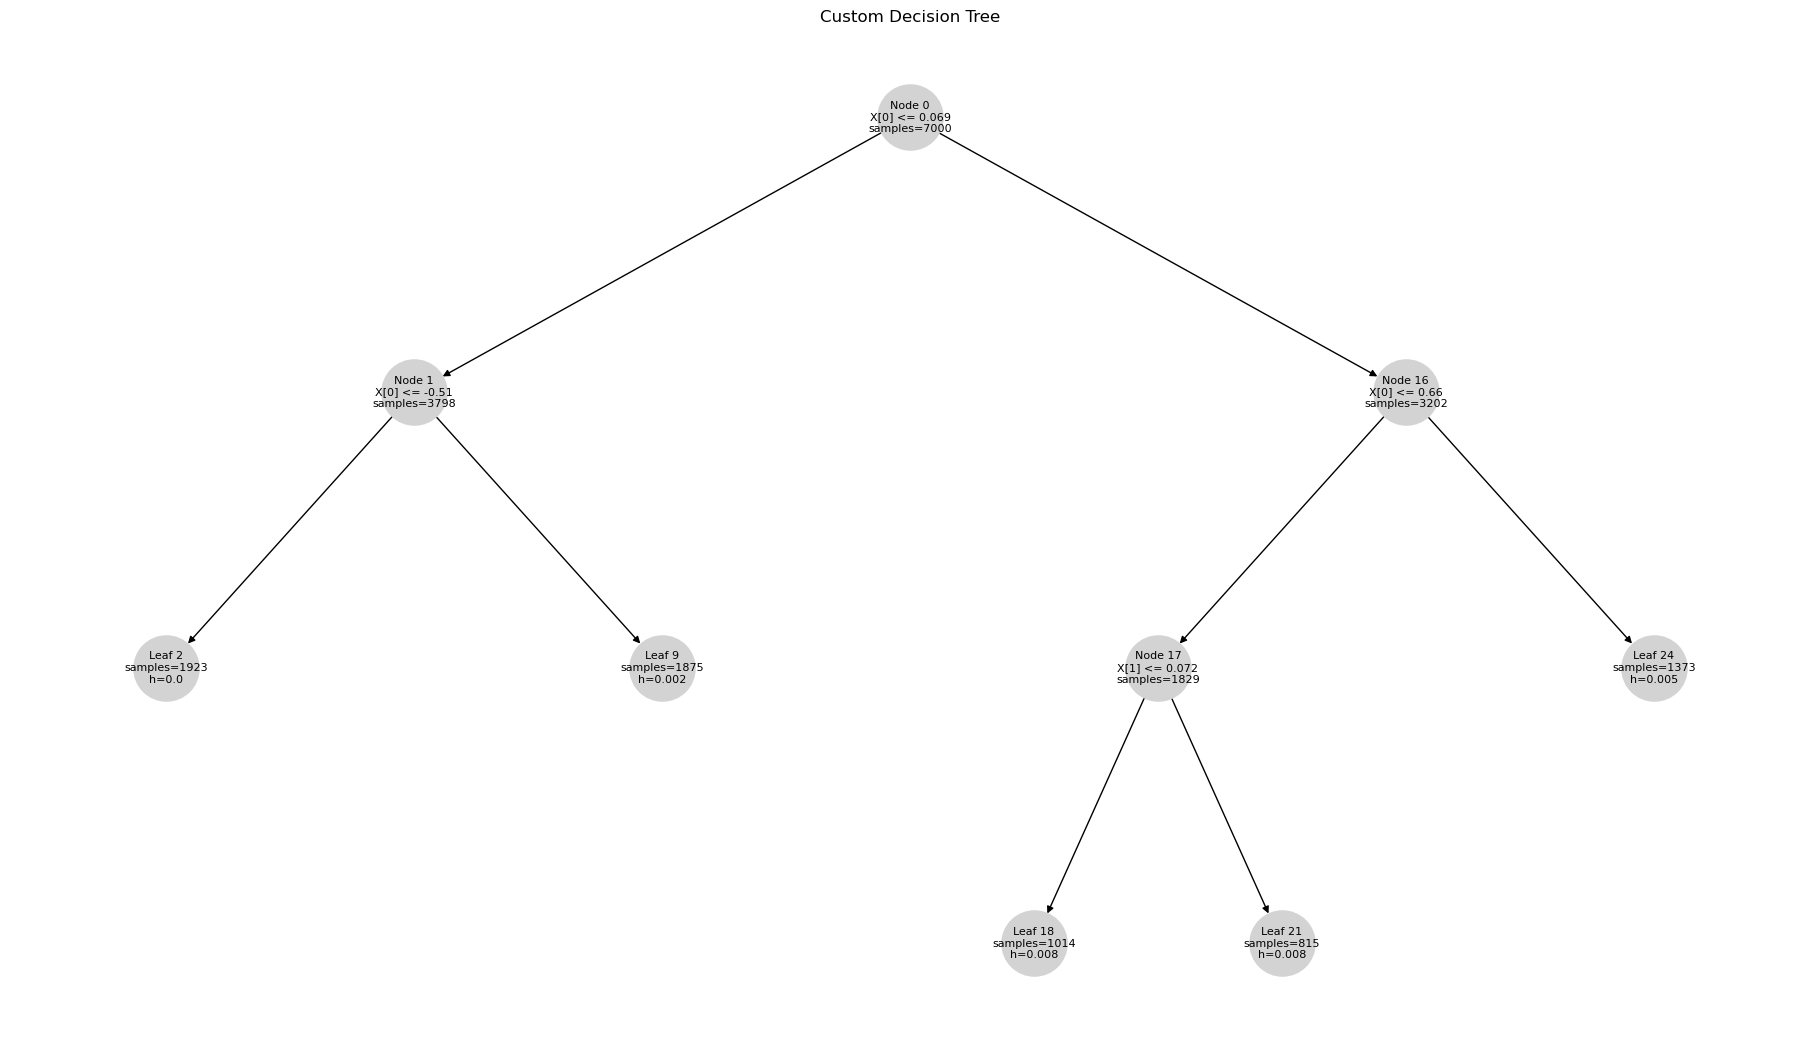

Using Gurobi minimax solver...
Using Gurobi minimax solver...
[ITER 12] pruning node 17 delta=-0.1079
Using Gurobi minimax solver...


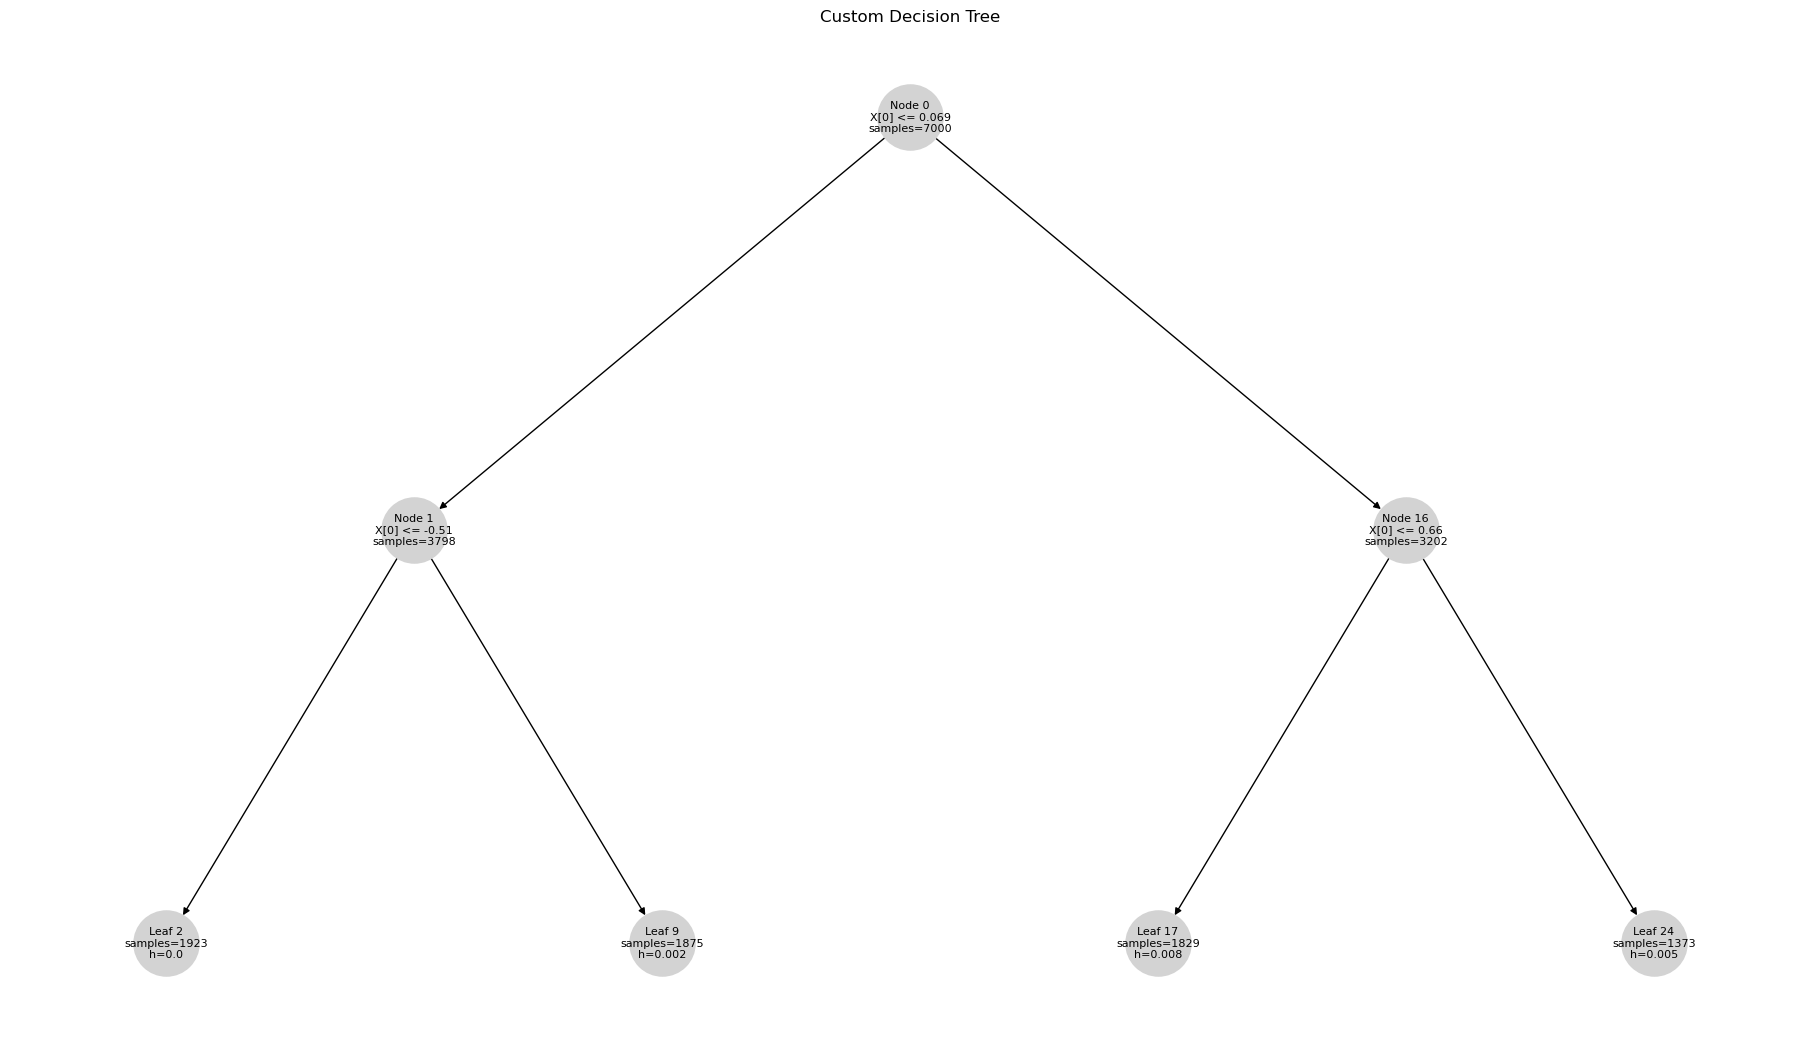

Using Gurobi minimax solver...
Using Gurobi minimax solver...
[ITER 13] pruning node 1 delta=-0.0861
Using Gurobi minimax solver...


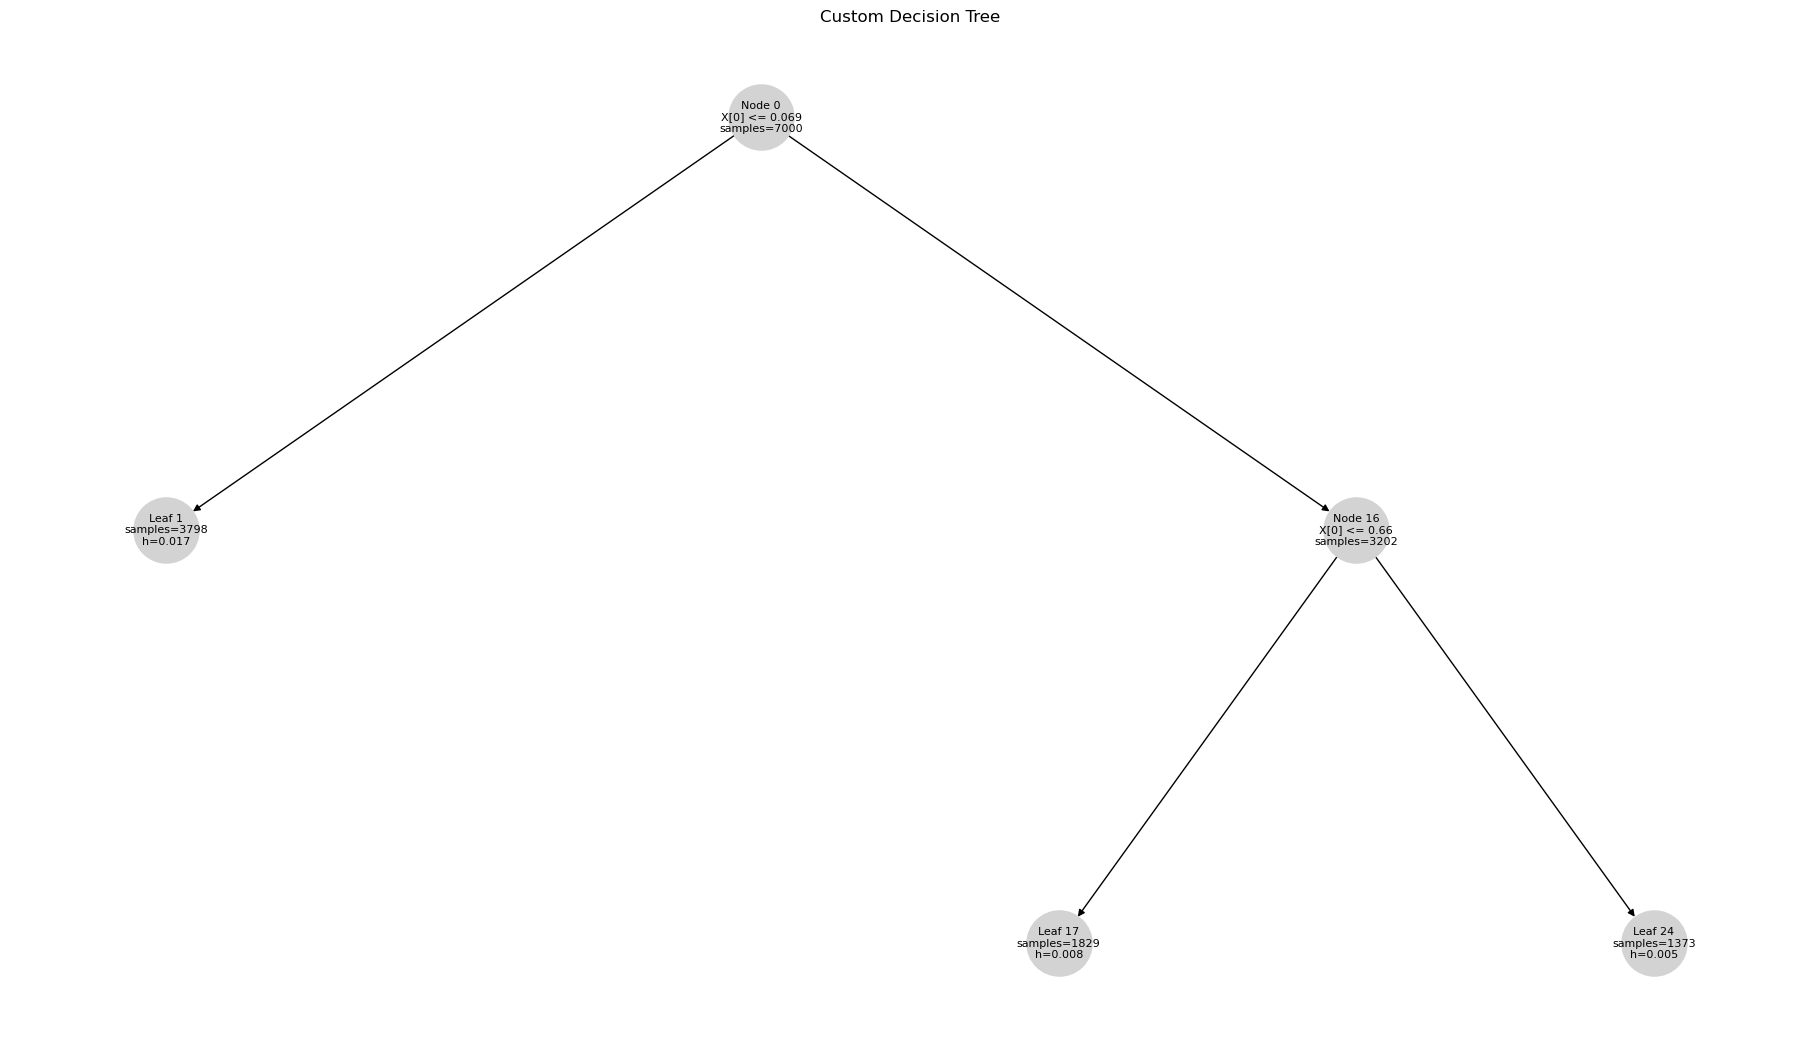

Using Gurobi minimax solver...
[ITER 14] pruning node 16 delta=-0.0123
Using Gurobi minimax solver...


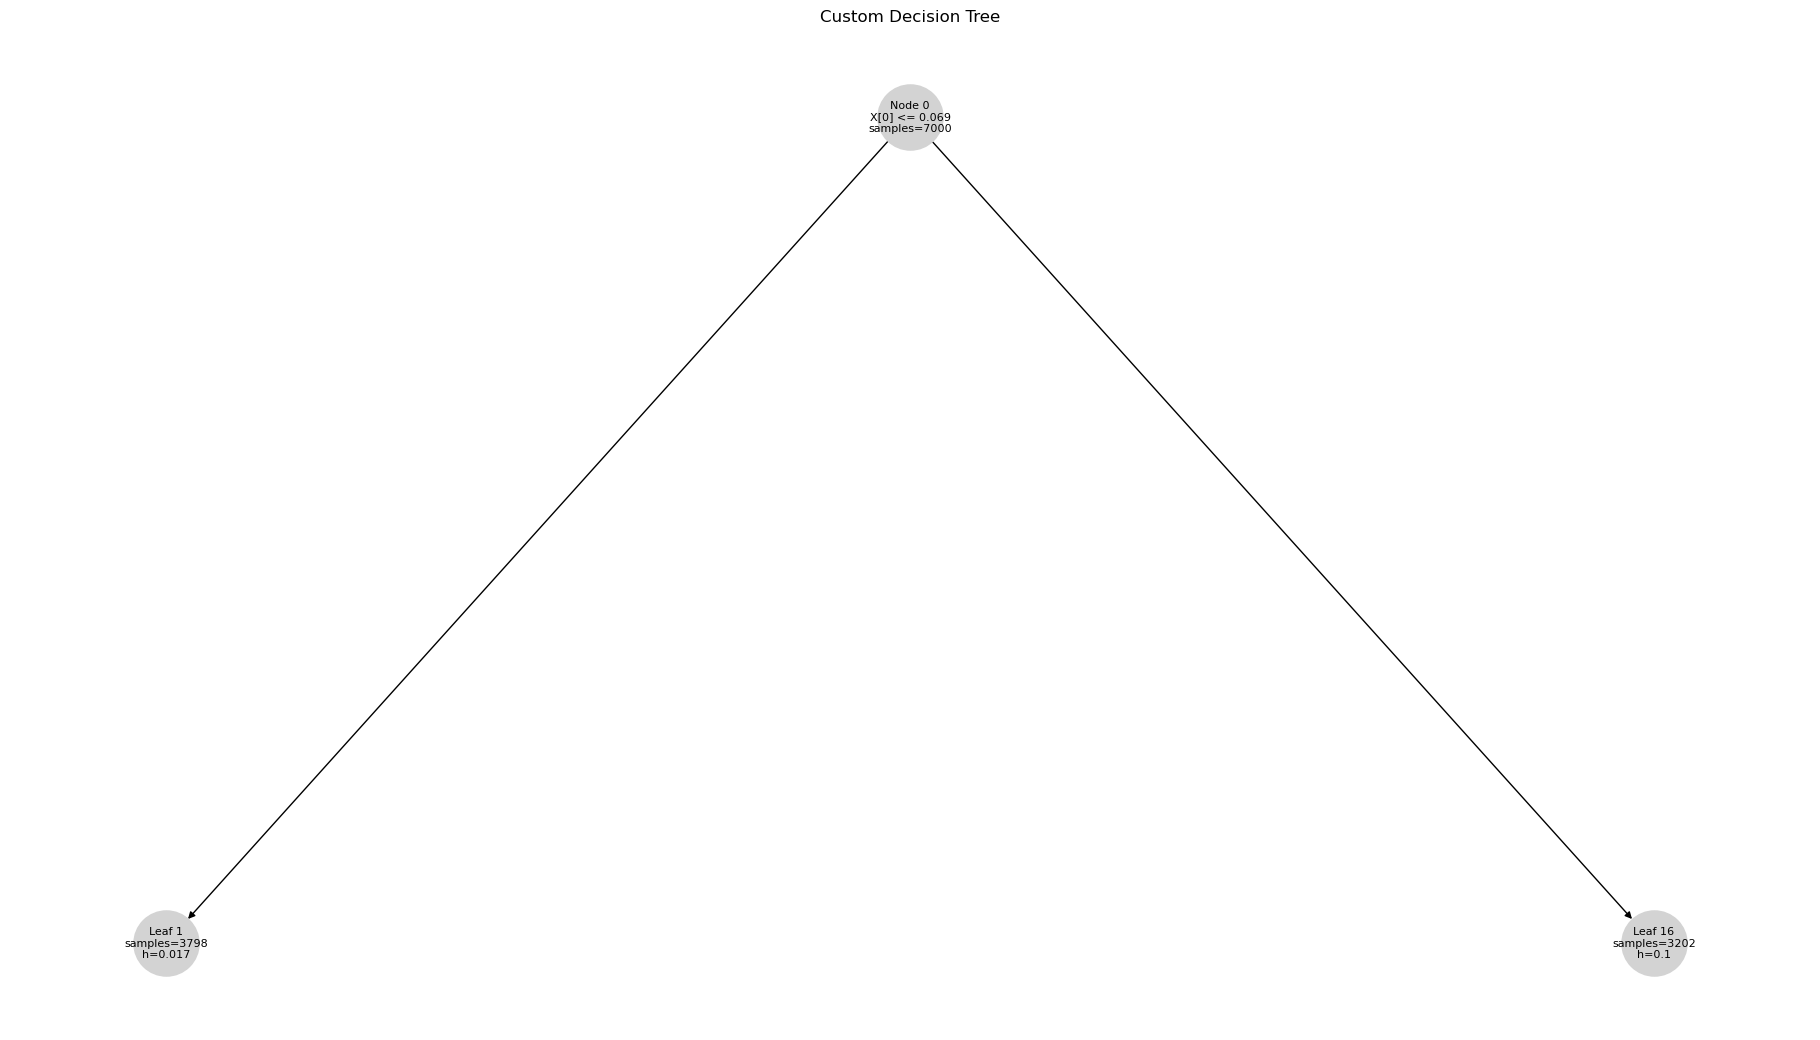

Using Gurobi minimax solver...


In [33]:
global_greedy_prune(custom_tree, X_train, y_train, alpha=0.1, plot_tree_each_iteration=True)


In [147]:
print("\nAFTER")
print("nodes :", custom_tree.num_nodes())
print("leaves:", custom_tree.num_leaves())
print("depth :", custom_tree.compute_max_depth())


AFTER
nodes : 31
leaves: 16
depth : 4


In [37]:
test_h_leaves = custom_tree.get_leaves()
for test_leaf in test_h_leaves:
    print(test_leaf.h)

0.01652994430504354
0.10029350851956845


[ITER 1] candidates for pruning: 8
Using Gurobi minimax solver...
  Node 3: delta=-0.0100
Using Gurobi minimax solver...
  Node 6: delta=-0.0100
Using Gurobi minimax solver...
  Node 10: delta=-0.0098
Using Gurobi minimax solver...
  Node 13: delta=-0.0098
Using Gurobi minimax solver...
  Node 18: delta=-0.0095
Using Gurobi minimax solver...
  Node 21: delta=-0.0095
Using Gurobi minimax solver...
  Node 25: delta=-0.0097
Using Gurobi minimax solver...
  Node 28: delta=-0.0097
[ITER 1] Pruning node 6 with delta=-0.0100
Using Gurobi minimax solver...


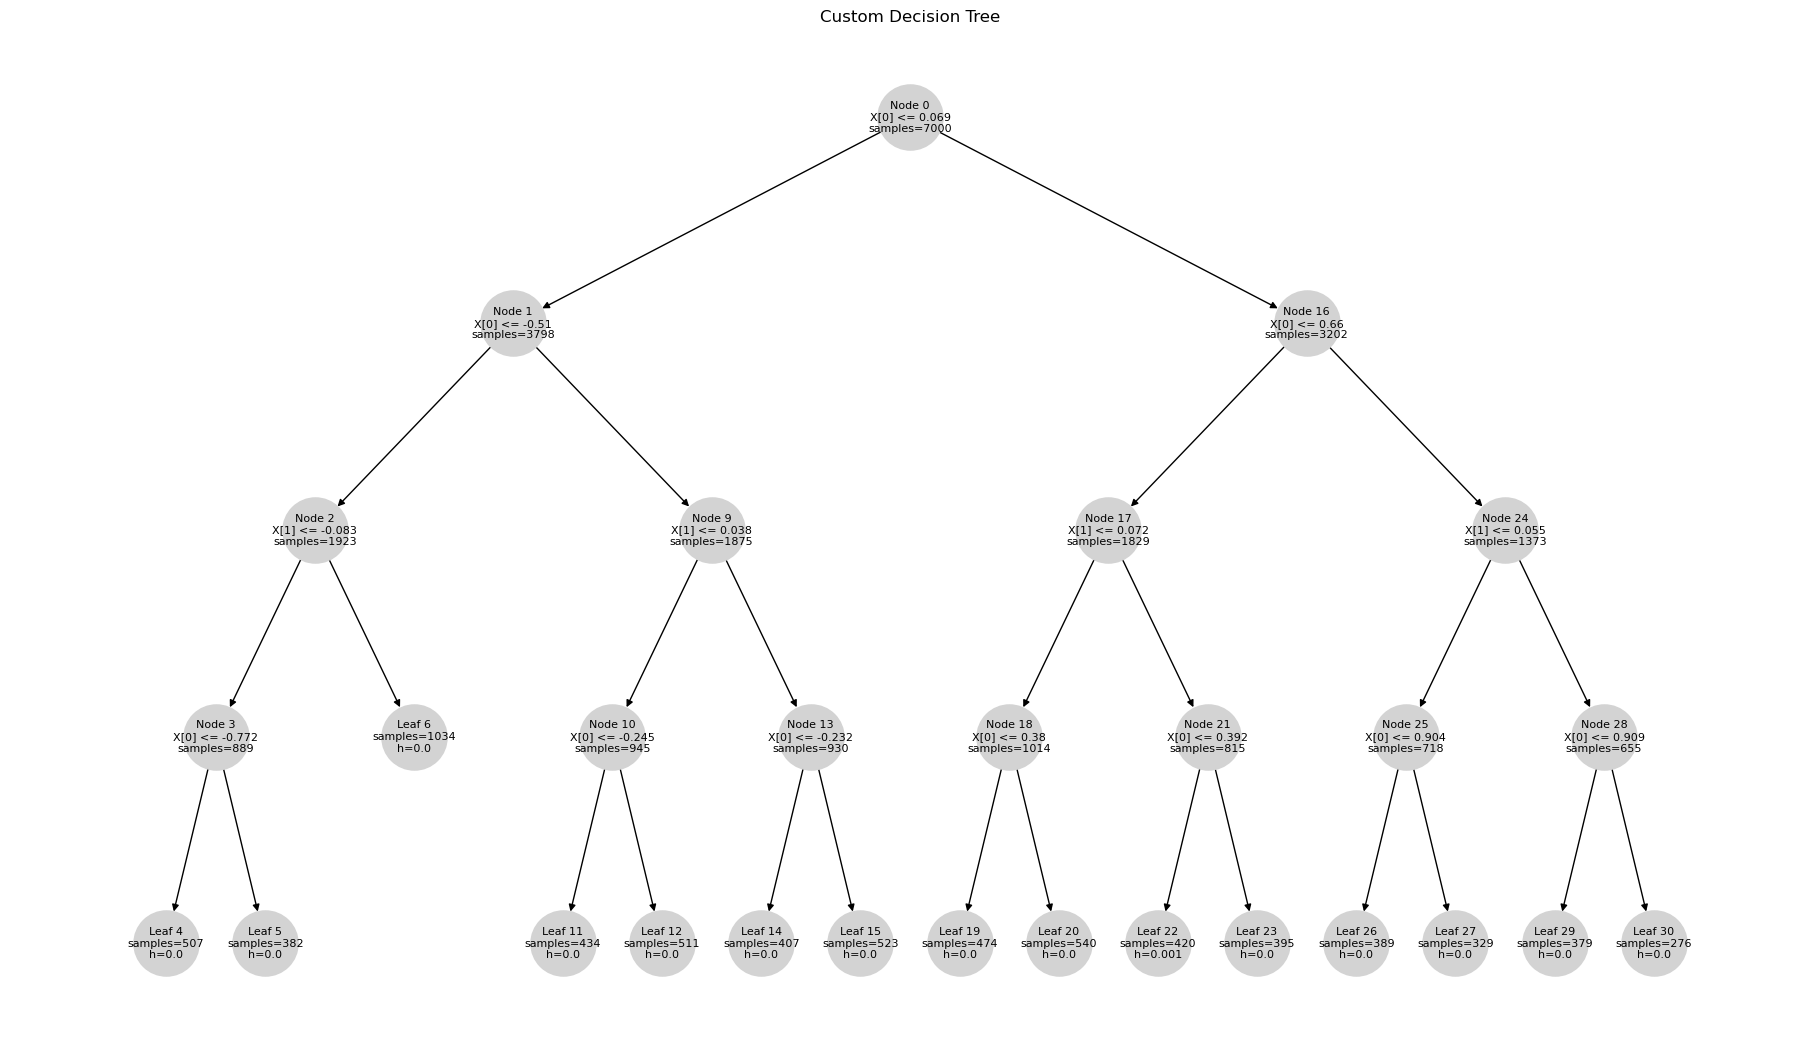

[ITER 2] candidates for pruning: 7
Using Gurobi minimax solver...
  Node 3: delta=-0.0100
Using Gurobi minimax solver...
  Node 10: delta=-0.0098
Using Gurobi minimax solver...
  Node 13: delta=-0.0098
Using Gurobi minimax solver...
  Node 18: delta=-0.0095
Using Gurobi minimax solver...
  Node 21: delta=-0.0095
Using Gurobi minimax solver...
  Node 25: delta=-0.0097
Using Gurobi minimax solver...
  Node 28: delta=-0.0097
[ITER 2] Pruning node 3 with delta=-0.0100
Using Gurobi minimax solver...


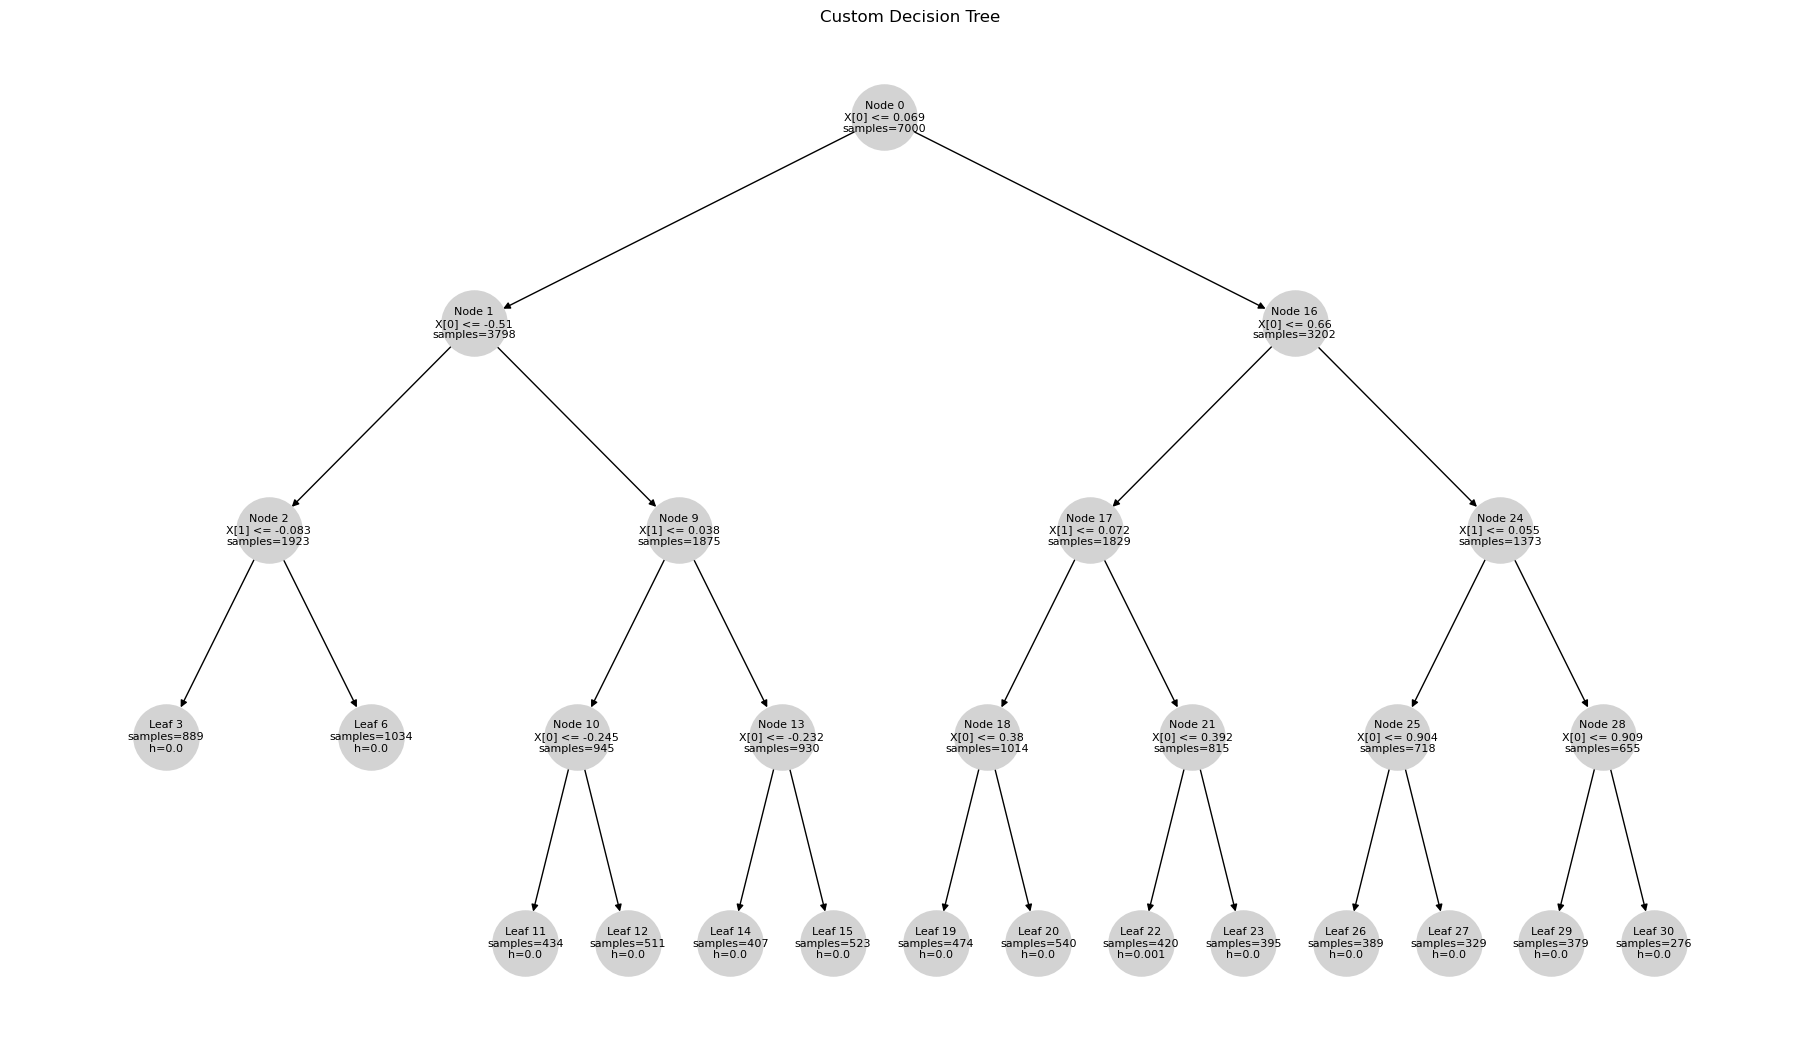

[ITER 3] candidates for pruning: 7
Using Gurobi minimax solver...
  Node 2: delta=-0.0100
Using Gurobi minimax solver...
  Node 10: delta=-0.0098
Using Gurobi minimax solver...
  Node 13: delta=-0.0098
Using Gurobi minimax solver...
  Node 18: delta=-0.0094
Using Gurobi minimax solver...
  Node 21: delta=-0.0094
Using Gurobi minimax solver...
  Node 25: delta=-0.0097
Using Gurobi minimax solver...
  Node 28: delta=-0.0097
[ITER 3] Pruning node 2 with delta=-0.0100
Using Gurobi minimax solver...


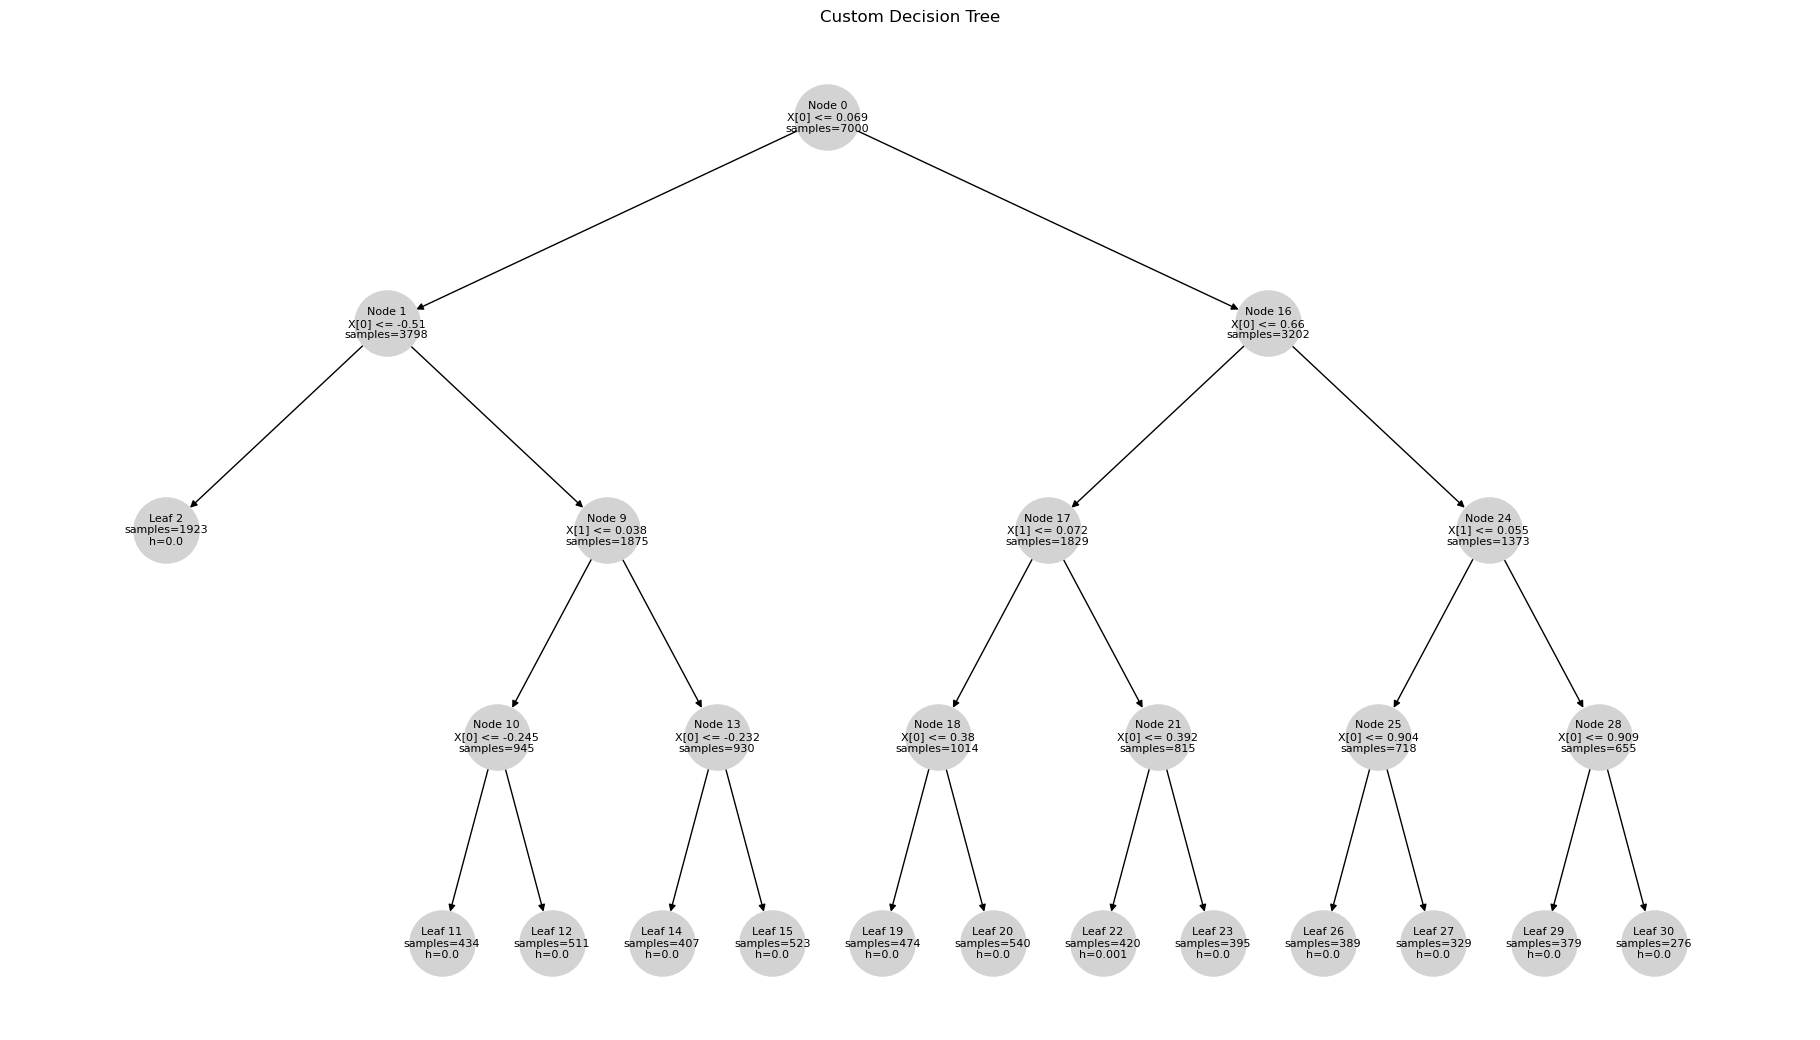

[ITER 4] candidates for pruning: 6
Using Gurobi minimax solver...
  Node 10: delta=-0.0098
Using Gurobi minimax solver...
  Node 13: delta=-0.0098
Using Gurobi minimax solver...
  Node 18: delta=-0.0094
Using Gurobi minimax solver...
  Node 21: delta=-0.0094
Using Gurobi minimax solver...
  Node 25: delta=-0.0096
Using Gurobi minimax solver...
  Node 28: delta=-0.0096
[ITER 4] Pruning node 10 with delta=-0.0098
Using Gurobi minimax solver...


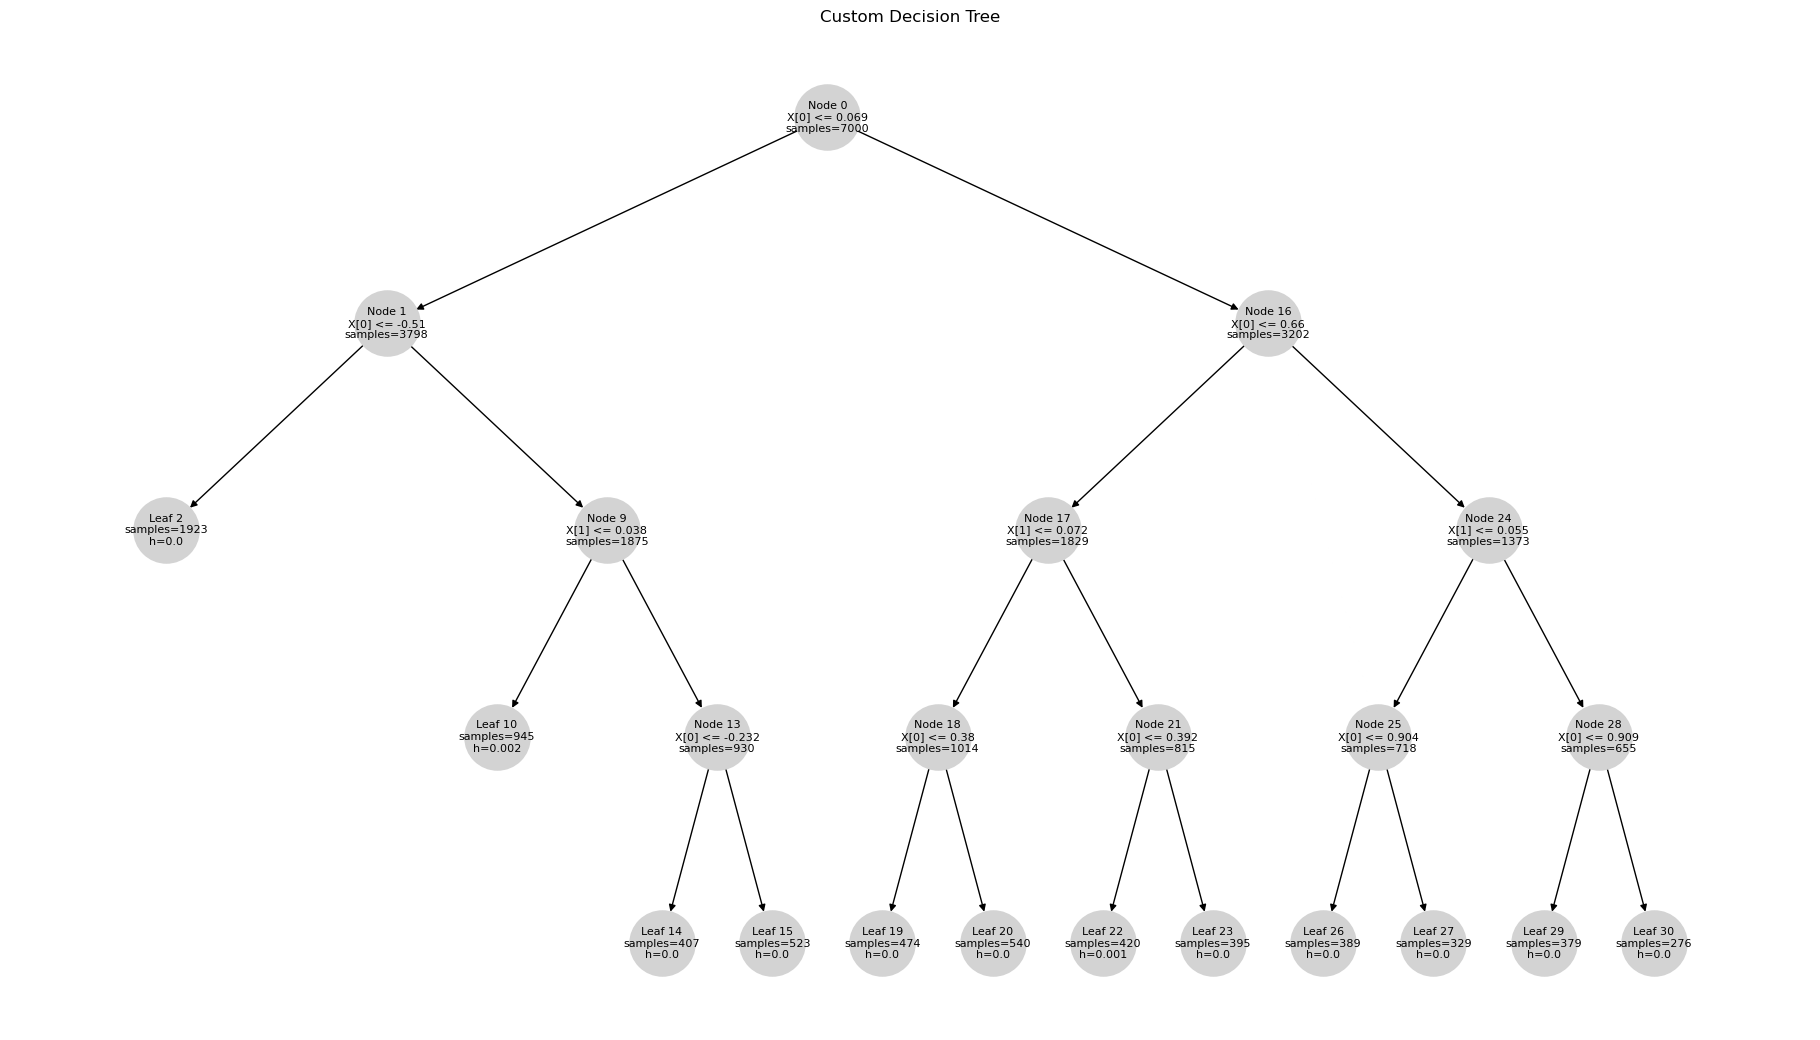

[ITER 5] candidates for pruning: 5
Using Gurobi minimax solver...
  Node 13: delta=-0.0098
Using Gurobi minimax solver...
  Node 18: delta=-0.0093
Using Gurobi minimax solver...
  Node 21: delta=-0.0093
Using Gurobi minimax solver...
  Node 25: delta=-0.0096
Using Gurobi minimax solver...
  Node 28: delta=-0.0096
[ITER 5] Pruning node 13 with delta=-0.0098
Using Gurobi minimax solver...


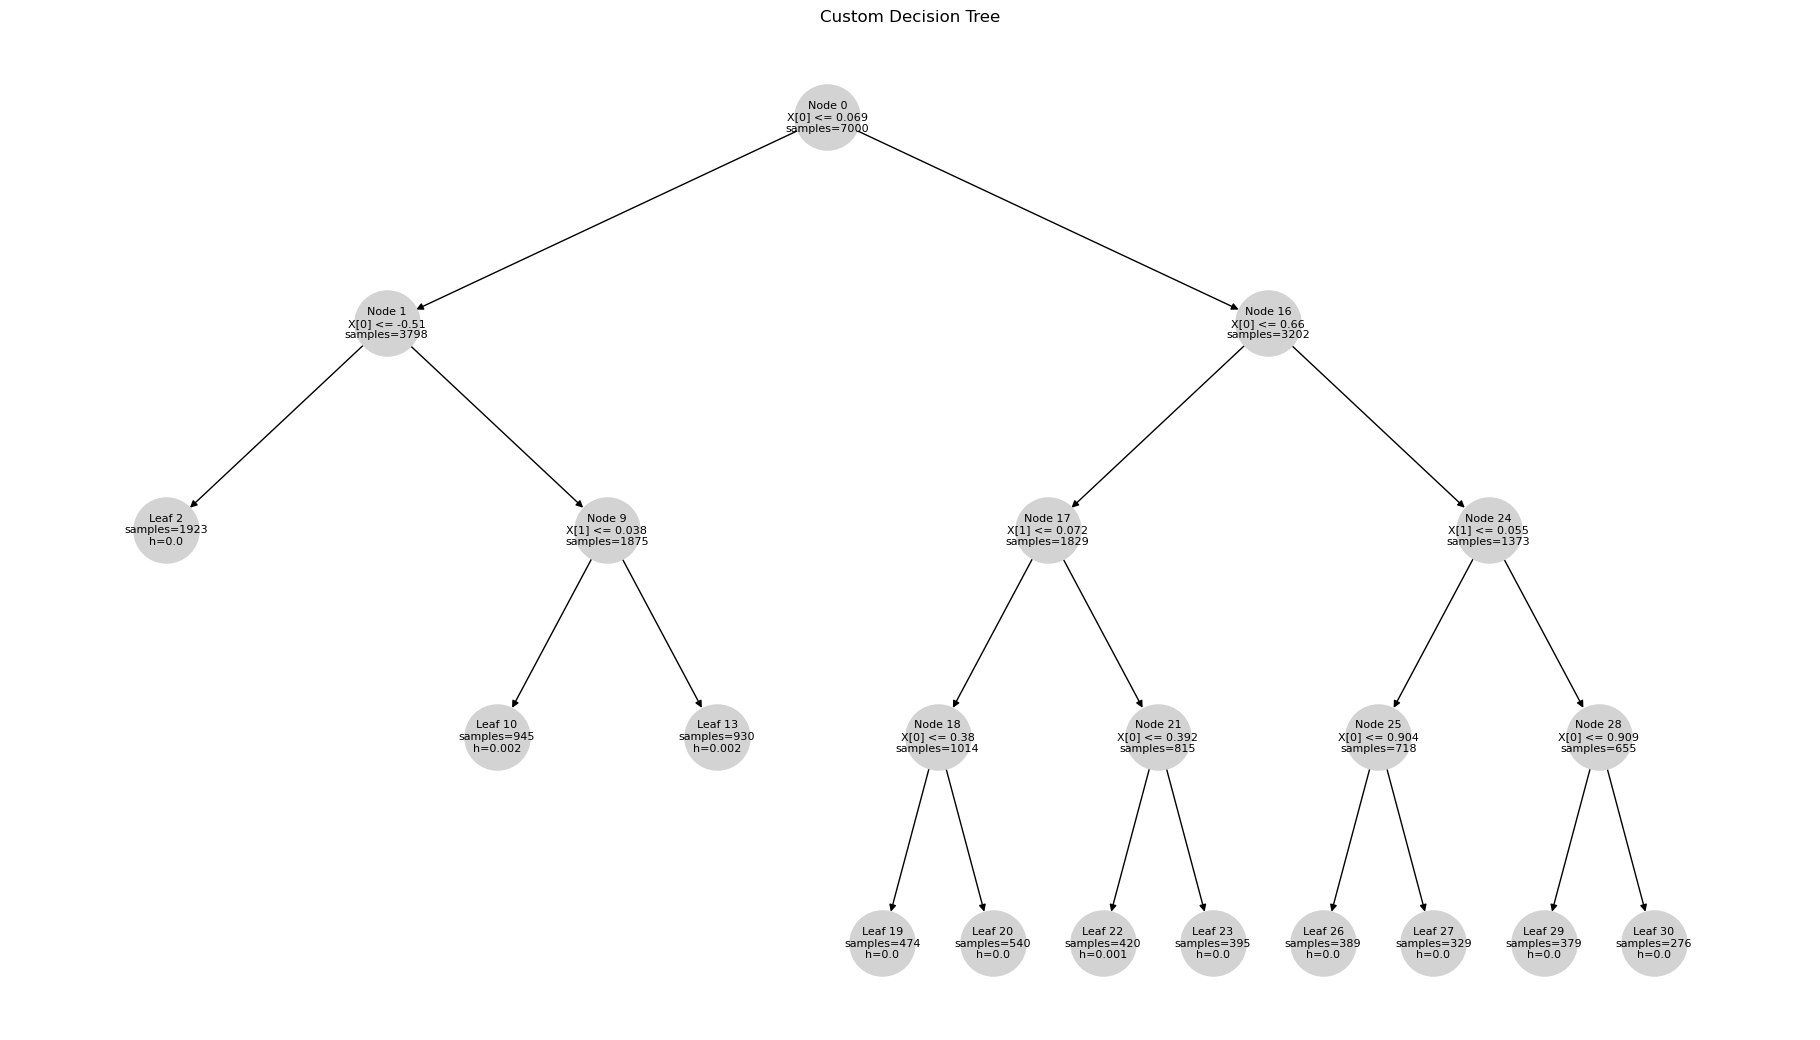

[ITER 6] candidates for pruning: 5
Using Gurobi minimax solver...
  Node 9: delta=-0.0102
Using Gurobi minimax solver...
  Node 18: delta=-0.0092
Using Gurobi minimax solver...
  Node 21: delta=-0.0092
Using Gurobi minimax solver...
  Node 25: delta=-0.0095
Using Gurobi minimax solver...
  Node 28: delta=-0.0095
[ITER 6] Pruning node 9 with delta=-0.0102
Using Gurobi minimax solver...


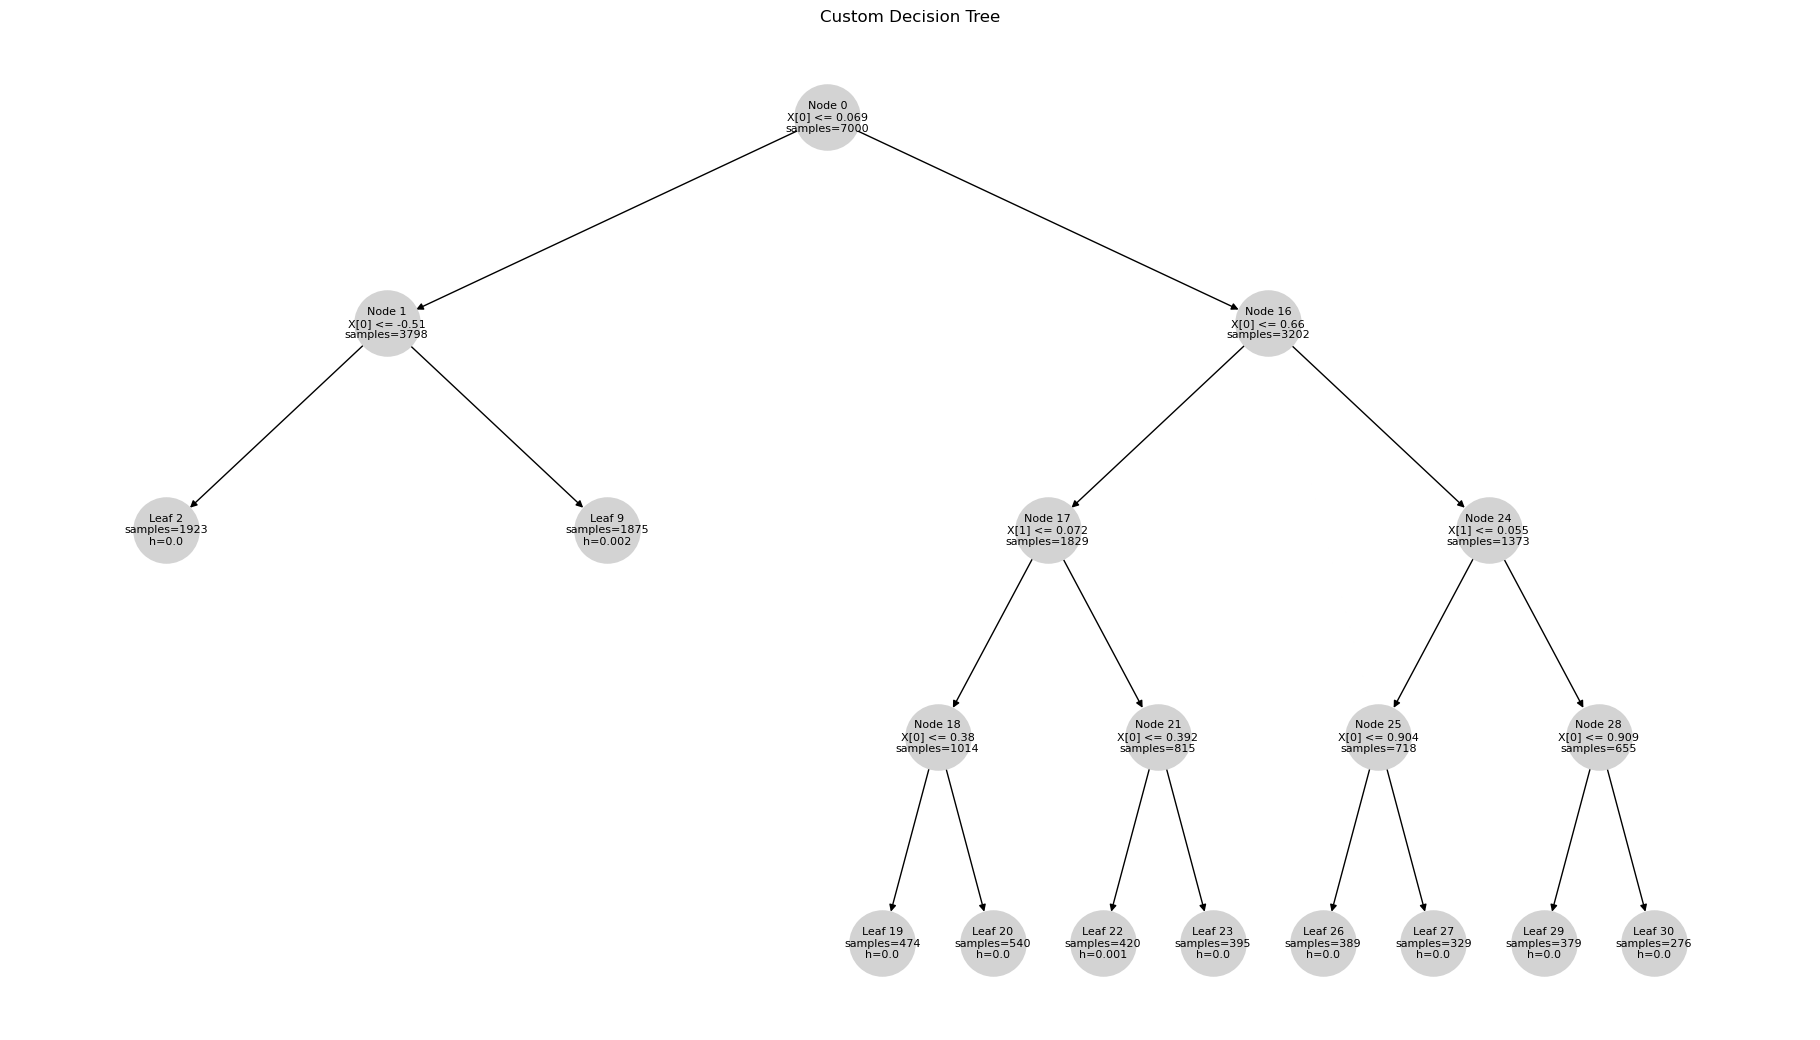

[ITER 7] candidates for pruning: 5
Using Gurobi minimax solver...
  Node 1: delta=-0.0084
Using Gurobi minimax solver...
  Node 18: delta=-0.0092
Using Gurobi minimax solver...
  Node 21: delta=-0.0092
Using Gurobi minimax solver...
  Node 25: delta=-0.0095
Using Gurobi minimax solver...
  Node 28: delta=-0.0095
[ITER 7] Pruning node 28 with delta=-0.0095
Using Gurobi minimax solver...


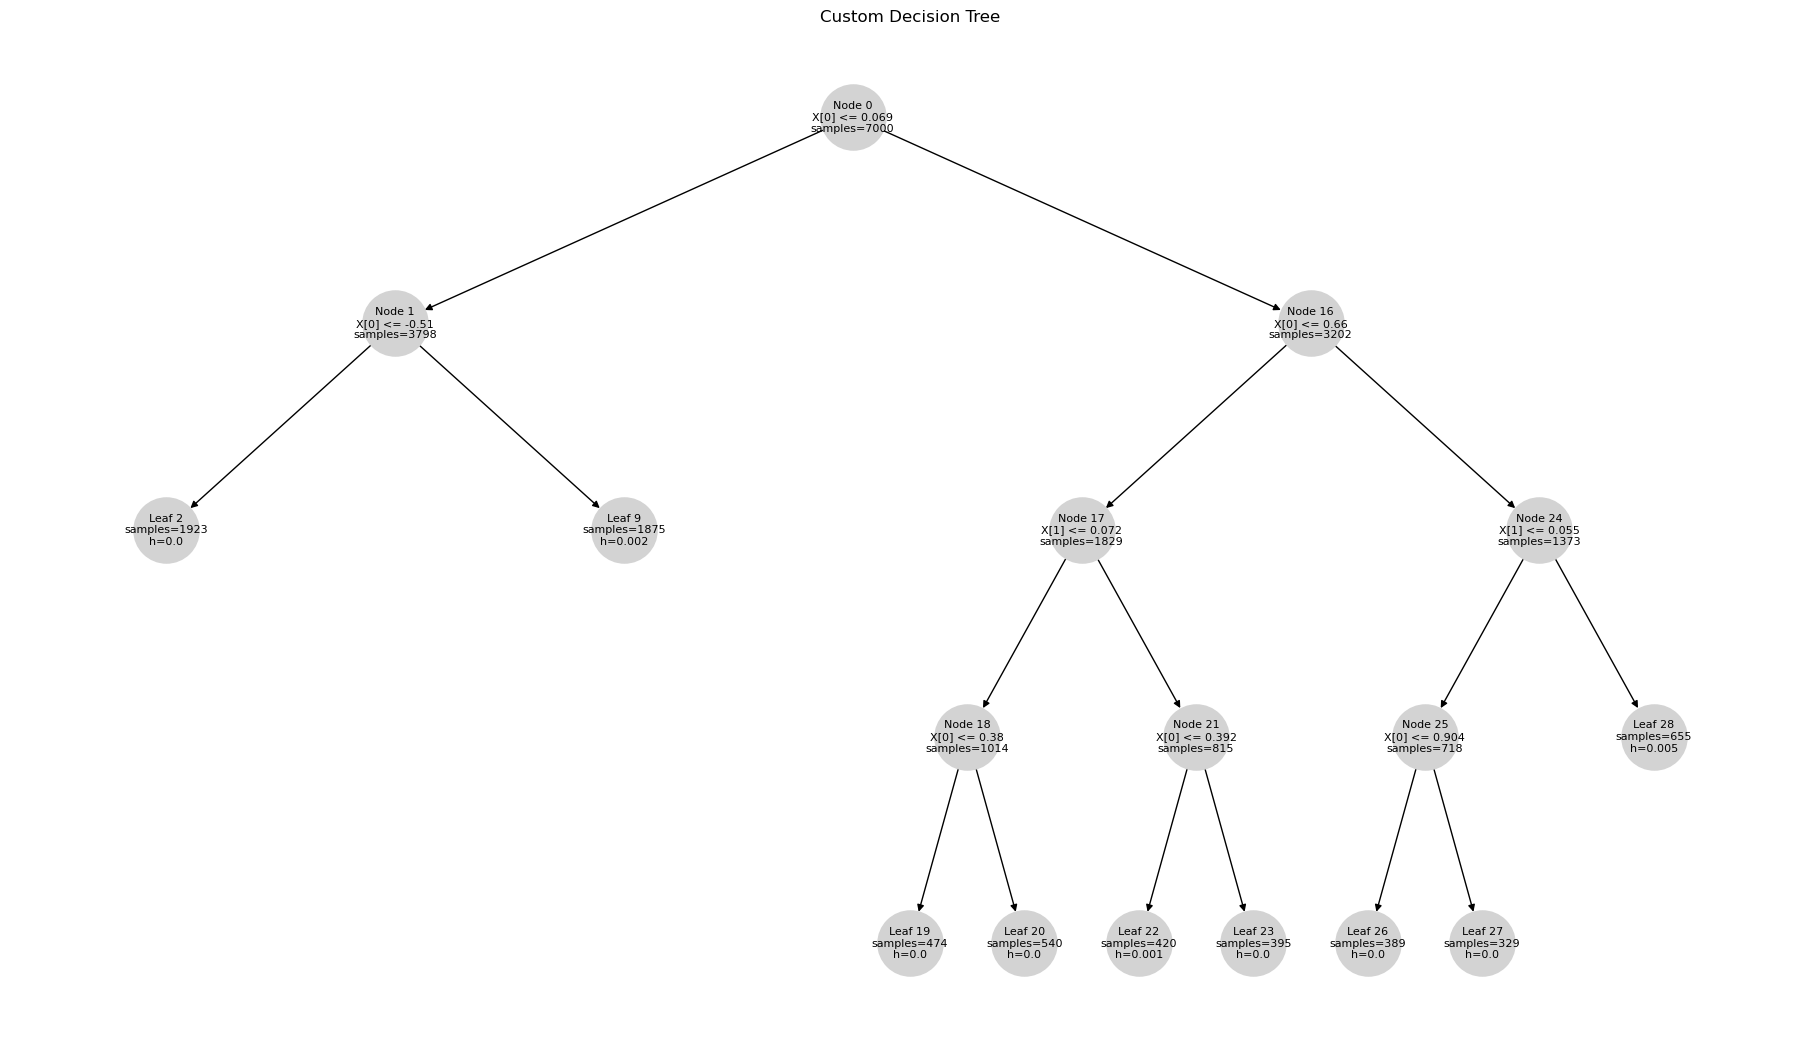

[ITER 8] candidates for pruning: 4
Using Gurobi minimax solver...
  Node 1: delta=-0.0081
Using Gurobi minimax solver...
  Node 18: delta=-0.0090
Using Gurobi minimax solver...
  Node 21: delta=-0.0090
Using Gurobi minimax solver...
  Node 25: delta=-0.0094
[ITER 8] Pruning node 25 with delta=-0.0094
Using Gurobi minimax solver...


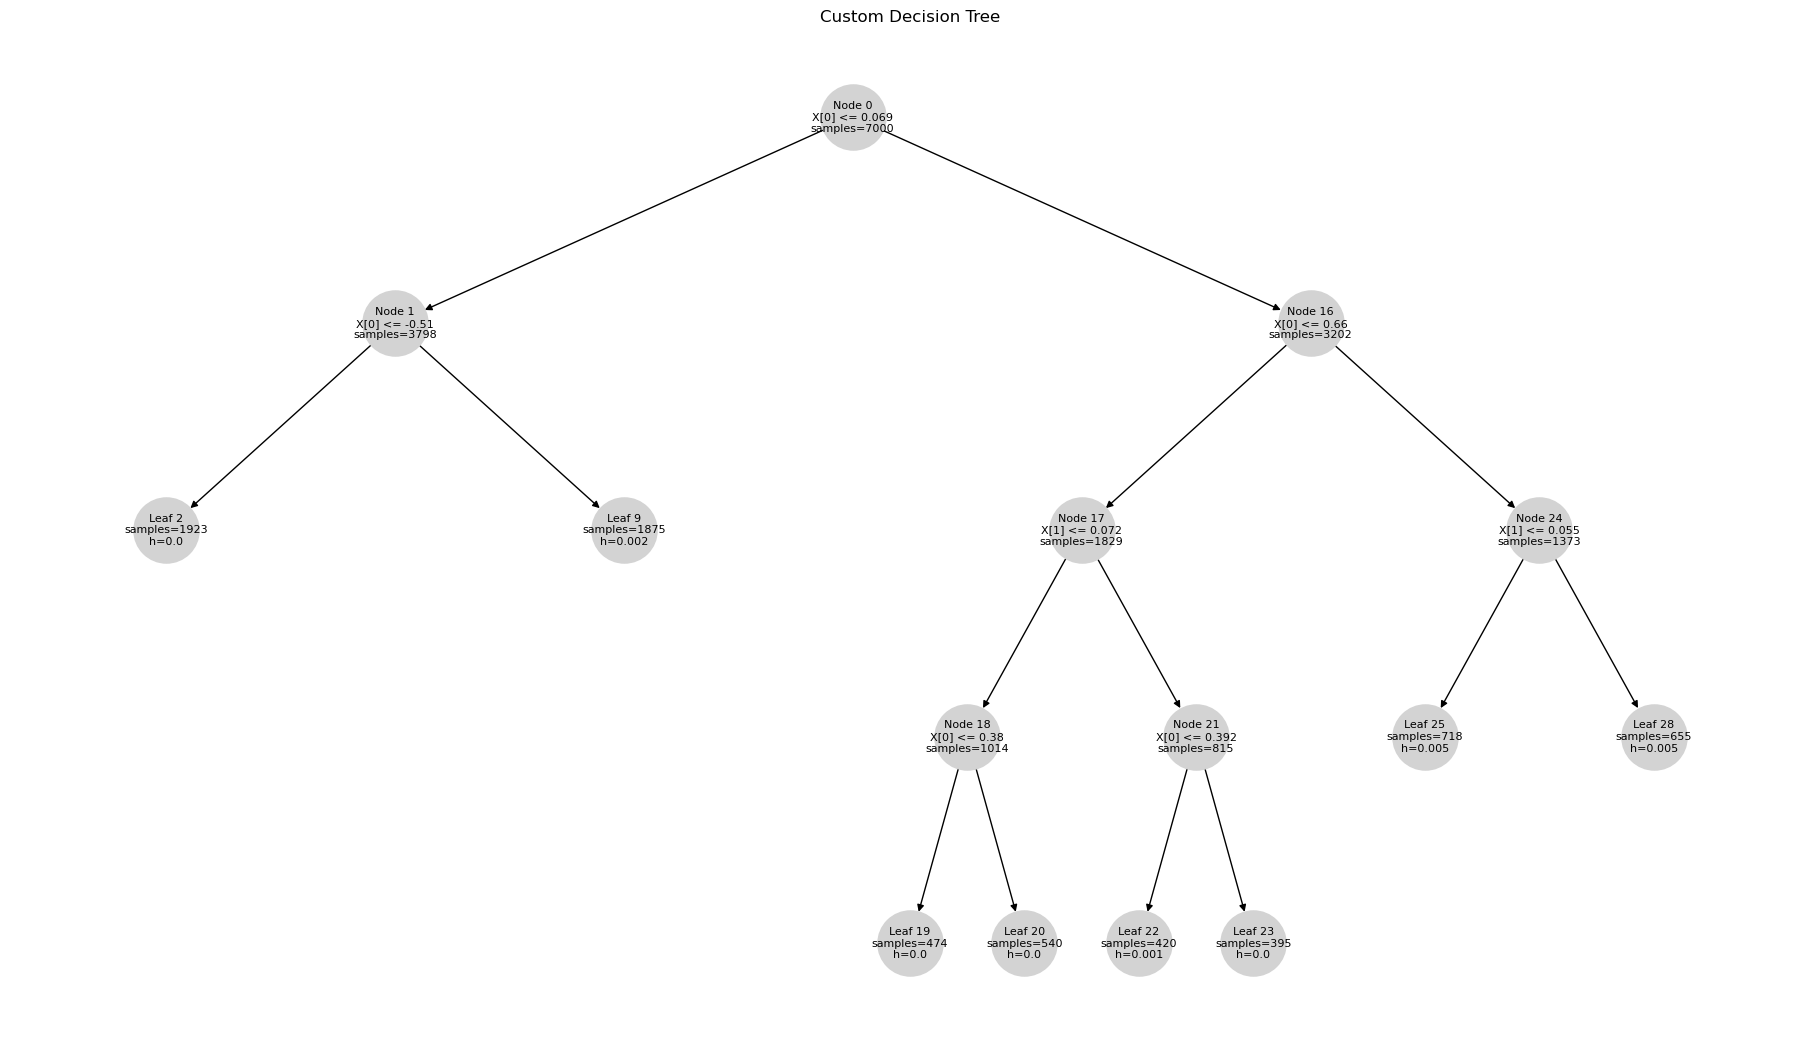

[ITER 9] candidates for pruning: 4
Using Gurobi minimax solver...
  Node 1: delta=-0.0078
Using Gurobi minimax solver...
  Node 18: delta=-0.0088
Using Gurobi minimax solver...
  Node 21: delta=-0.0088
Using Gurobi minimax solver...
  Node 24: delta=-0.0104
[ITER 9] Pruning node 24 with delta=-0.0104
Using Gurobi minimax solver...


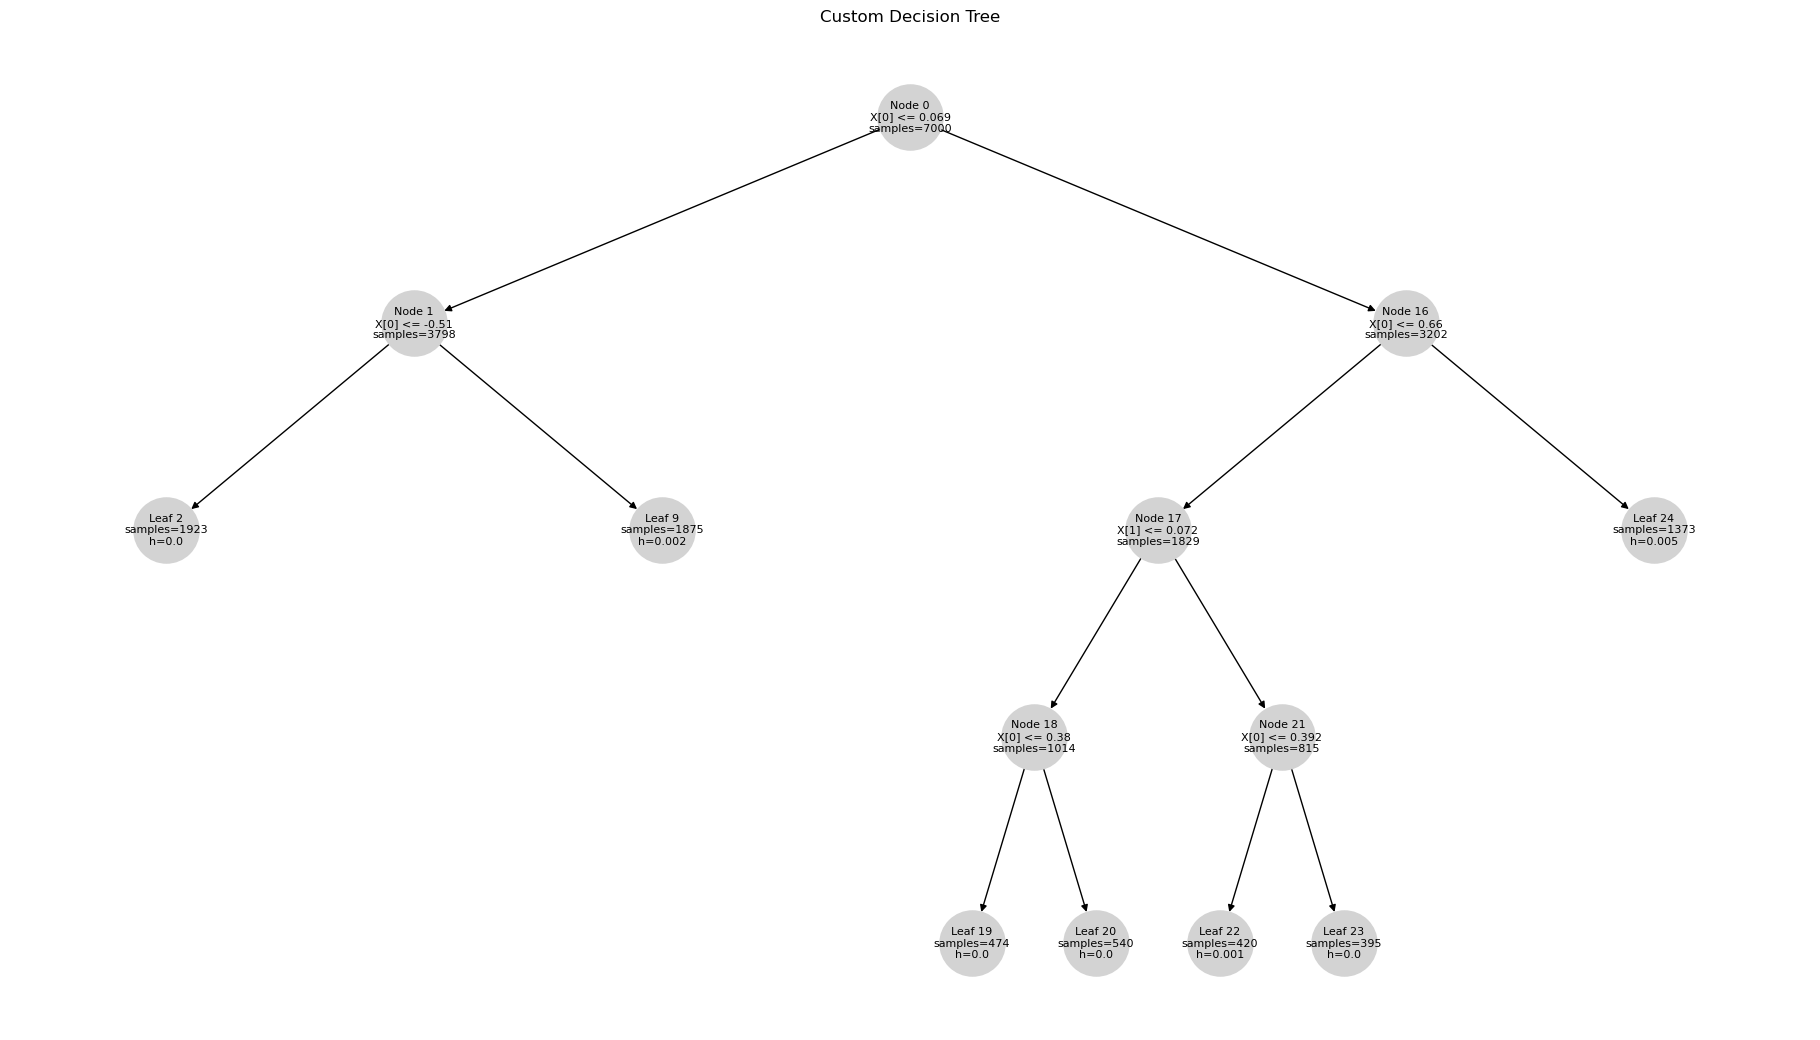

[ITER 10] candidates for pruning: 3
Using Gurobi minimax solver...
  Node 1: delta=-0.0075
Using Gurobi minimax solver...
  Node 18: delta=-0.0086
Using Gurobi minimax solver...
  Node 21: delta=-0.0086
[ITER 10] Pruning node 21 with delta=-0.0086
Using Gurobi minimax solver...


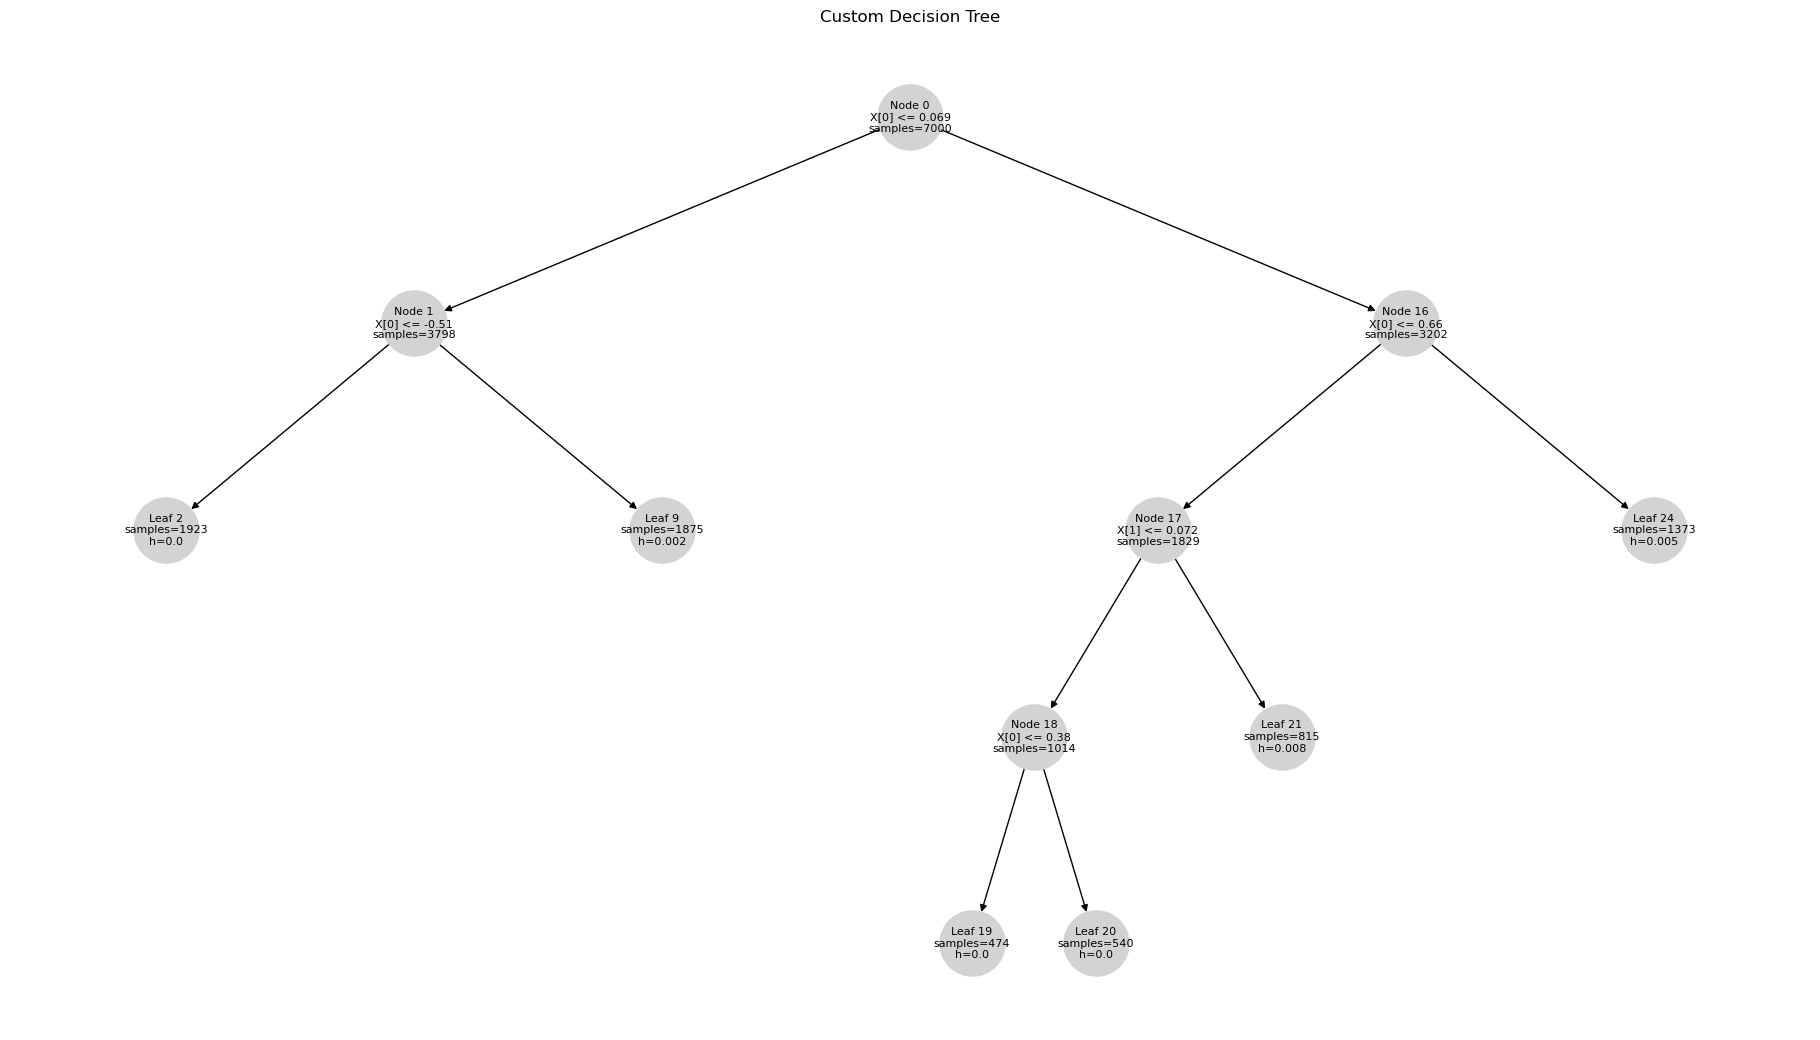

[ITER 11] candidates for pruning: 2
Using Gurobi minimax solver...
  Node 1: delta=-0.0067
Using Gurobi minimax solver...
  Node 18: delta=-0.0081
[ITER 11] Pruning node 18 with delta=-0.0081
Using Gurobi minimax solver...


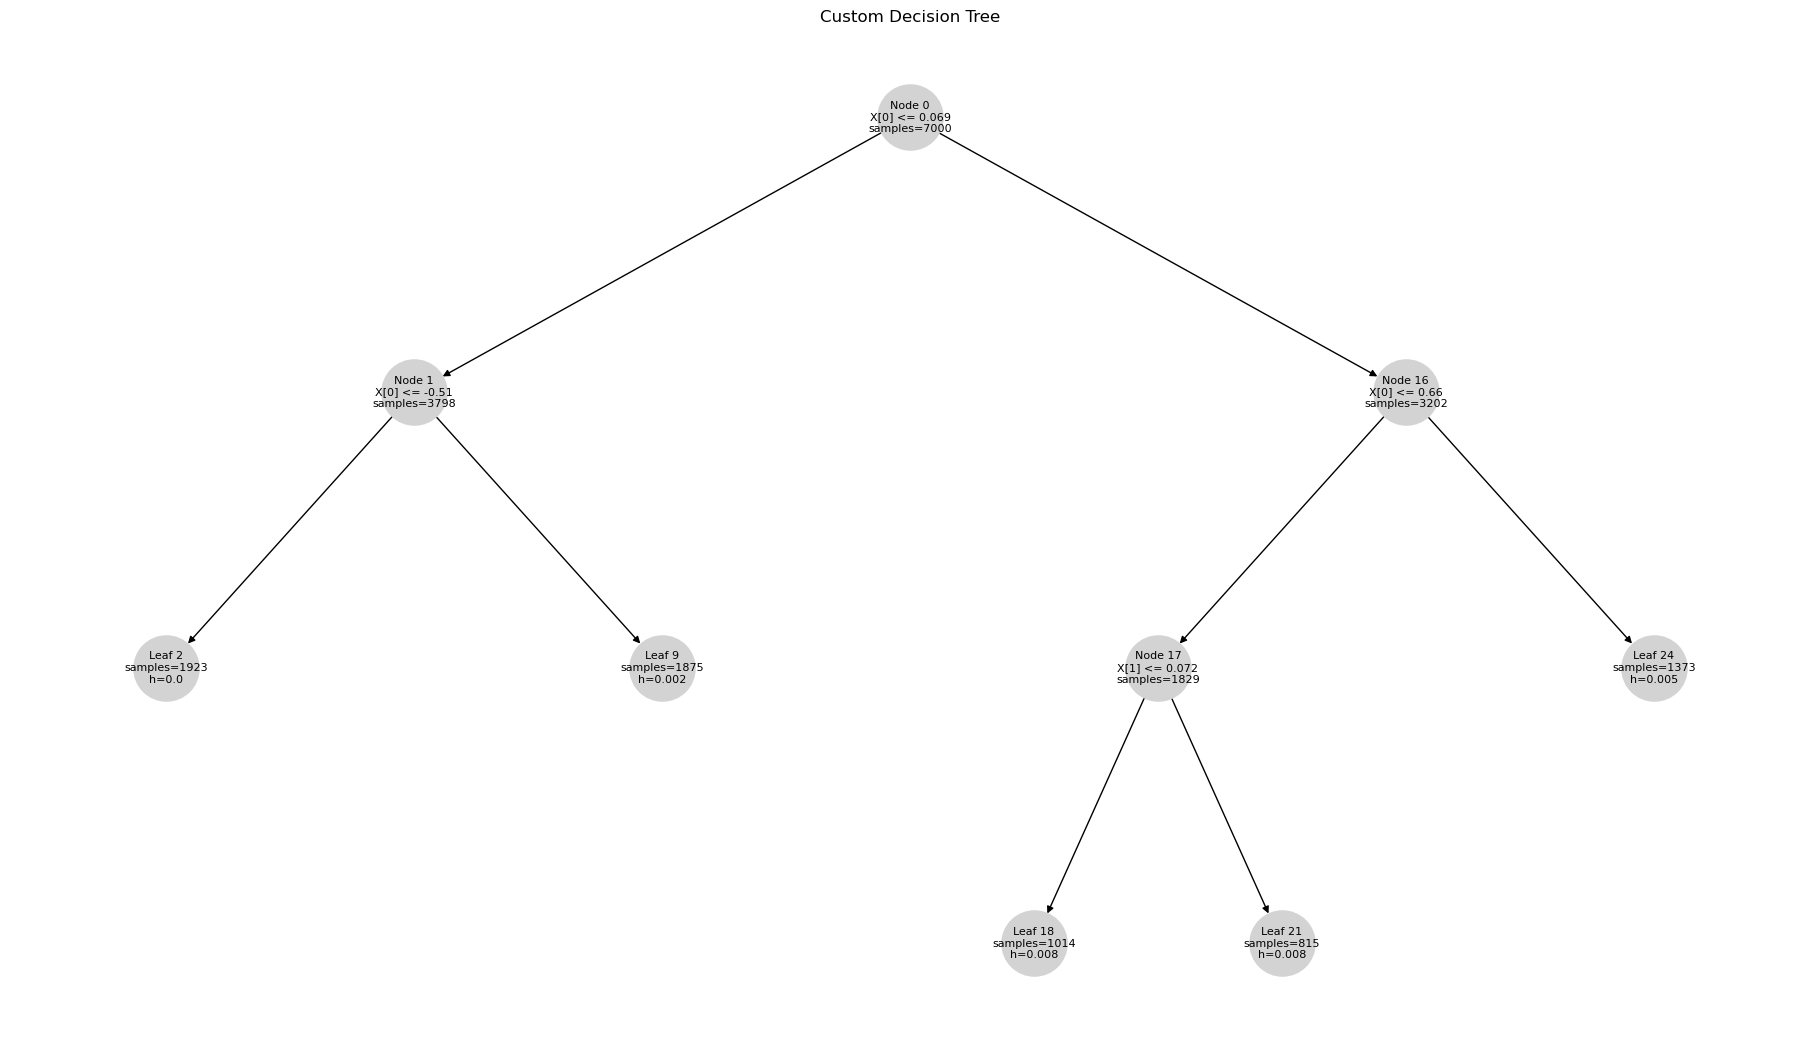

[ITER 12] candidates for pruning: 2
Using Gurobi minimax solver...
  Node 1: delta=-0.0054
Using Gurobi minimax solver...
  Node 17: delta=-0.0108
[ITER 12] Pruning node 17 with delta=-0.0108
Using Gurobi minimax solver...


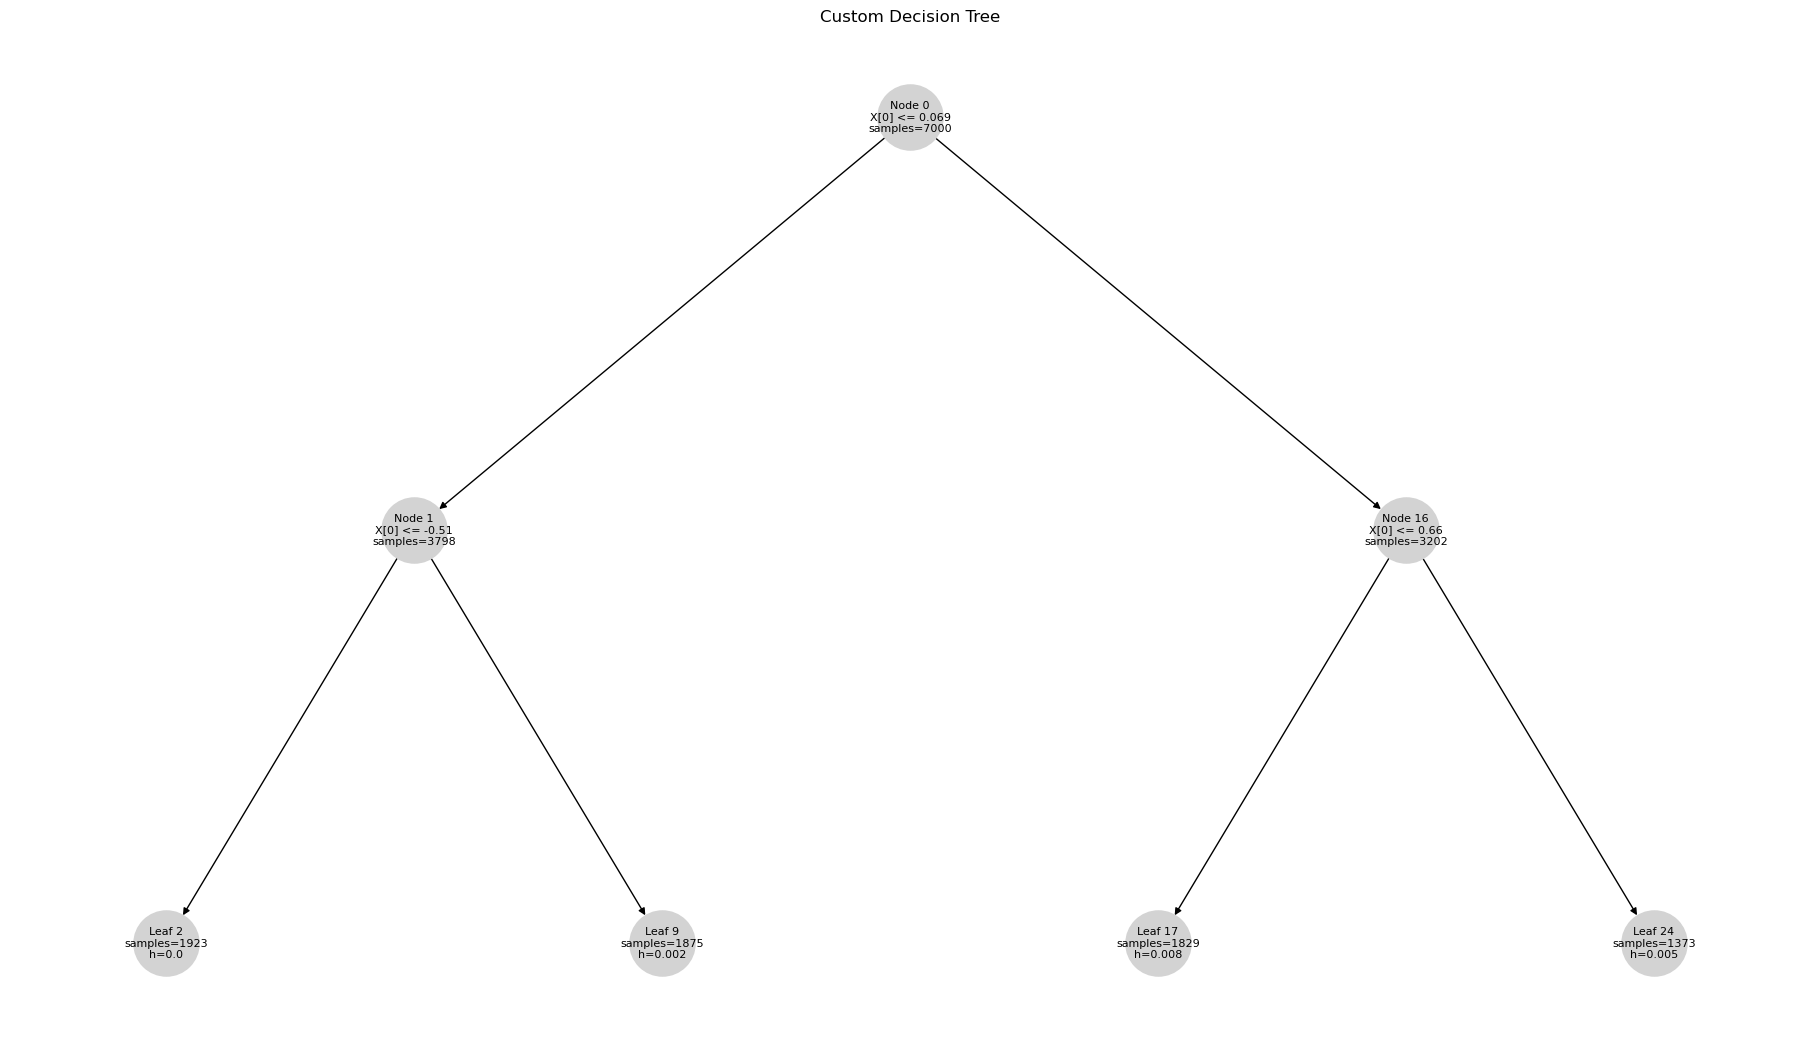

[ITER 13] candidates for pruning: 2
Using Gurobi minimax solver...
  Node 1: delta=-0.0041
Using Gurobi minimax solver...
  Node 16: delta=0.0205
[ITER 13] Pruning node 1 with delta=-0.0041
Using Gurobi minimax solver...


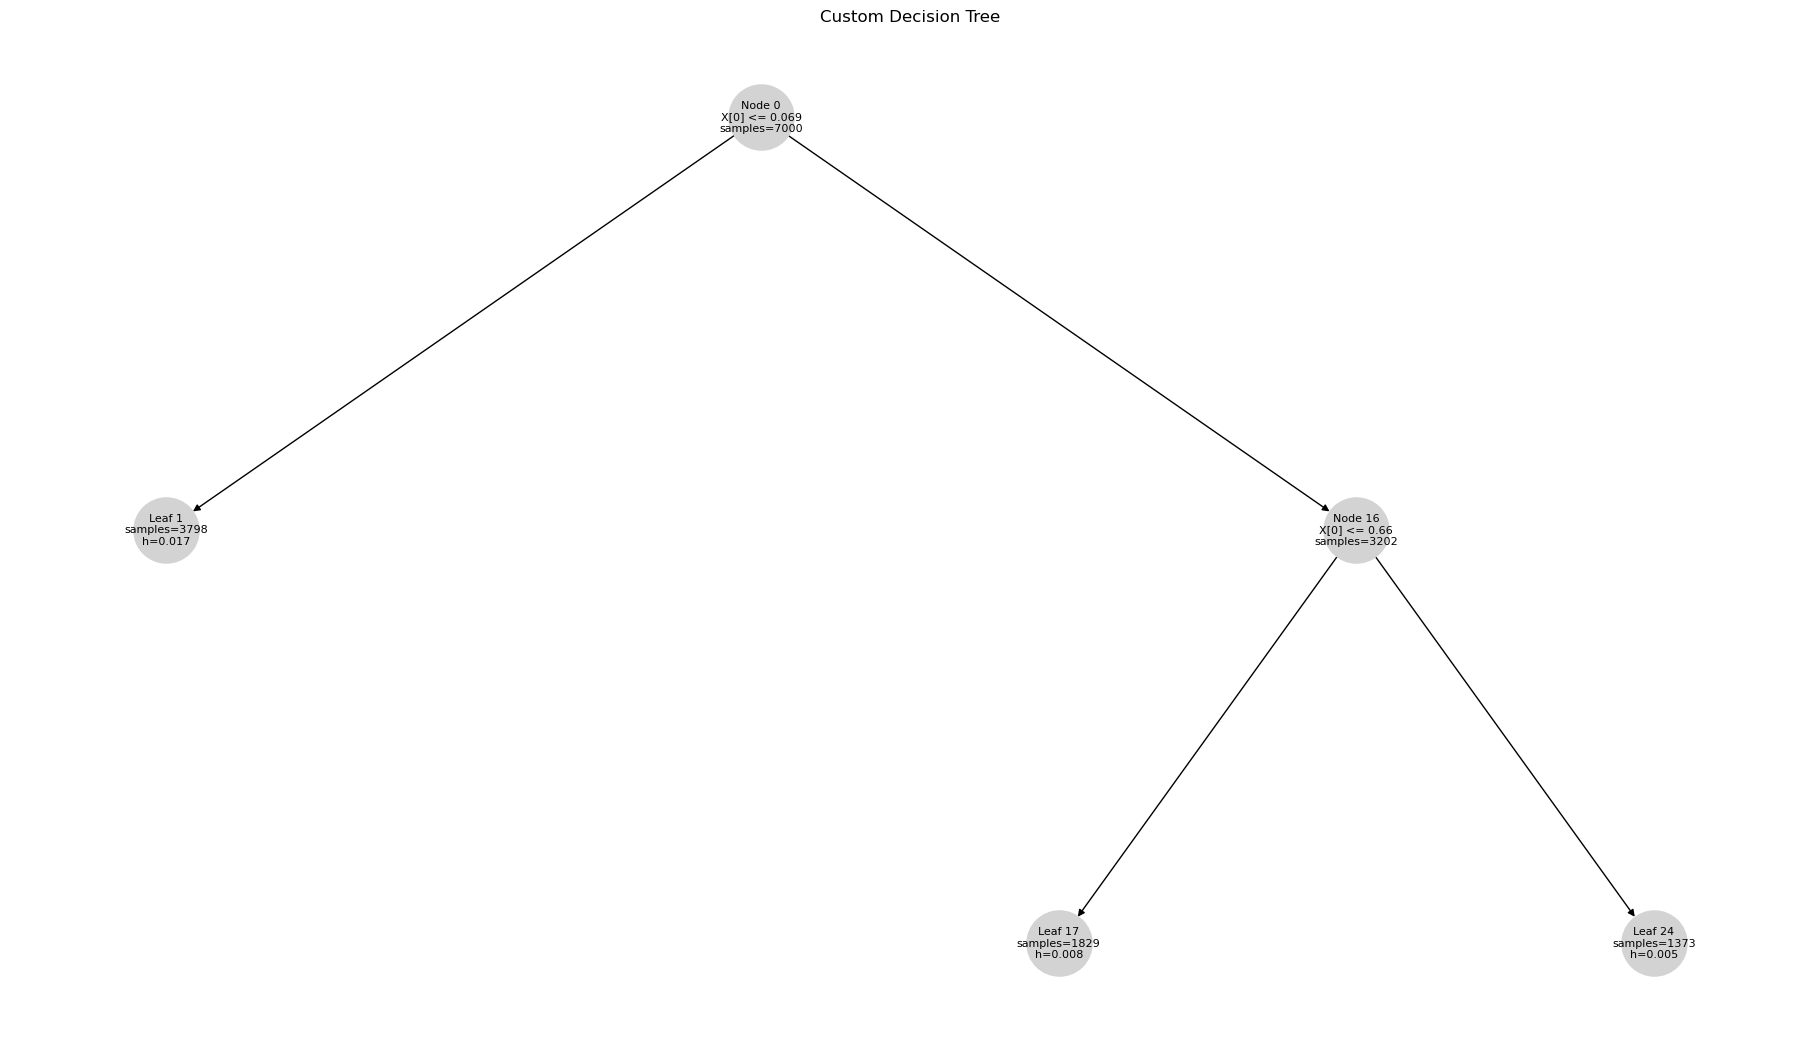

[ITER 14] candidates for pruning: 1
Using Gurobi minimax solver...
  Node 16: delta=0.0387
No more improving prunes.


In [227]:
alpha = 0.01
cost_fn = get_custom_cost_function(alpha, cost_type="average")

global_greedy_prune_with_custom_cost(custom_tree, X_train, y_train, cost_fn, plot_tree_each_iteration=True, alpha = alpha)

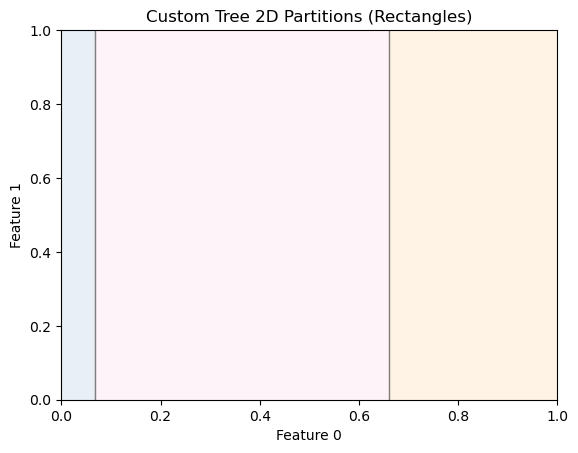

In [229]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# plot_tree_partitions(custom_tree, X_train, ax=ax)
plot_tree_partitions_2d_rectangles(custom_tree, X_train, ax)
plt.show()
# plot_tree_partitions_plotly(custom_tree, X_train)


In [231]:
y_predict = predict_with_minmax_model(custom_tree=custom_tree, X=X_train)


In [233]:
normalized_root_mean_square_error(y_true=y_train, y_pred=y_predict)

0.005979588892573755

In [235]:
y_test_predict = predict_with_minmax_model(custom_tree=custom_tree, X=X_test)
normalized_root_mean_square_error(y_true=y_test, y_pred=y_test_predict)

0.006017207371774865

In [244]:
plot_tree_partitions_3d_scatter(custom_tree, X_train)

ValueError: This function only supports 3D inputs.

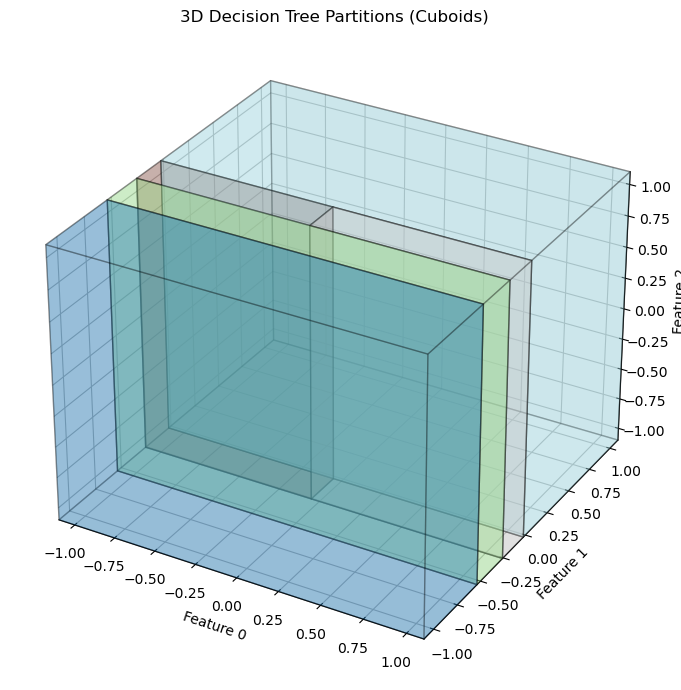

In [189]:
plot_tree_partitions_3d_cubes(custom_tree, X_train)
